# **Comparative Study Between Ensemble Learning and Evolutionary Learning to solve the Higgs Bozon Detection**



### Authors :
*   Ahmed MAALOUL
*   Aksel YILMAZ

### Environment :

* Google Colab with GPU enabled (T4) for accelerated computation.

# Dataset Description and Aim

## Dataset Description

**Title**: Dataset from the ATLAS Higgs Boson Machine Learning Challenge 2014  
**Source**: ATLAS Collaboration, CERN Open Data Portal  

This dataset was created for the ATLAS Higgs Boson Machine Learning Challenge and is derived from official ATLAS full-detector simulations. It contains events representing "Higgs to tau-tau" signals mixed with various background processes. The events are simulated to mimic real detector data, leveraging our knowledge of particle physics. Each event includes detailed properties such as transverse momentum, invariant mass, and pseudorapidity, among others, which are crucial for classification tasks.

### Key Characteristics:
- **Number of events**: 818,238
- **File size**: 186.5 MiB
- **Evaluation Metric**: Approximate Median Significance (AMS)

### Simulation Process:
1. Random proton-proton collisions are simulated based on existing particle physics knowledge.
2. Resulting particles are tracked through a virtual model of the detector, yielding simulated events with properties mimicking real-world collisions.

### Signal and Background:
- **Signal Events**: Events in which Higgs bosons (with a fixed mass of 125 GeV) are produced.
- **Background Events**: Other known processes producing similar signatures, including:
  - Decay of Z bosons into two taus.
  - Events with top quark pairs producing leptons and hadronic taus.
  - W boson decays producing electrons or muons with hadronic taus (due to particle identification imperfections).

### Weights:
Each simulated event has a weight proportional to its conditional density. These weights are crucial for accurate evaluation of the AMS metric but are excluded as inputs to the classifier.

---

## Aim of the Analysis
The goal is to develop and compare machine learning models for detecting Higgs boson events based on the dataset’s features. Specifically, the objectives are:
1. **Preprocessing**: Handle missing values, normalize features, and prepare the data for modeling.
2. **Model Implementation**:
   - Apply ensemble learning methods (e.g., Random Forest, Gradient Boosting).
   - Use evolutionary learning techniques to optimize performance.
3. **Performance Evaluation**:
   - Assess models using metrics such as AMS, accuracy, precision, recall, and F1-score.
   - Compare ensemble and evolutionary learning approaches in terms of performance and computational efficiency.
---

## Feature Descriptions

| **Variable**                 | **Description**                                                                                  |
|------------------------------|--------------------------------------------------------------------------------------------------|
| EventId                     | Unique identifier for the event.                                                               |
| DER_mass_MMC                | Estimated mass of the Higgs boson candidate.                                                   |
| DER_mass_transverse_met_lep | Transverse mass between missing transverse energy and the lepton.                              |
| DER_mass_vis                | Invariant mass of the hadronic tau and the lepton.                                             |
| DER_pt_h                    | Modulus of the vector sum of transverse momenta (hadronic tau, lepton, missing energy).        |
| DER_deltaeta_jet_jet        | Pseudorapidity separation between the two jets. Undefined if PRI_jet_num ≤ 1.                 |
| DER_mass_jet_jet            | Invariant mass of the two jets. Undefined if PRI_jet_num ≤ 1.                               |
| DER_prodeta_jet_jet         | Product of pseudorapidities of the two jets. Undefined if PRI_jet_num ≤ 1.                  |
| DER_deltar_tau_lep          | R separation between the hadronic tau and the lepton.                                          |
| DER_pt_tot                  | Modulus of the vector sum of transverse momenta of key particles.                              |
| DER_sum_pt                  | Sum of transverse momenta of all key particles and additional jets.                            |
| DER_pt_ratio_lep_tau        | Ratio of transverse momenta of the lepton and the hadronic tau.                                |
| DER_met_phi_centrality      | Centrality of the azimuthal angle of missing transverse energy relative to the tau and lepton. |
| DER_lep_eta_centrality      | Centrality of the pseudorapidity of the lepton relative to the two jets. Undefined if PRI_jet_num ≤ 1. |
| PRI_tau_pt                  | Transverse momentum of the hadronic tau.                                                       |
| PRI_tau_eta                 | Pseudorapidity of the hadronic tau.                                                            |
| PRI_tau_phi                 | Azimuth angle of the hadronic tau.                                                             |
| PRI_lep_pt                  | Transverse momentum of the lepton.                                                             |
| PRI_lep_eta                 | Pseudorapidity of the lepton.                                                                  |
| PRI_lep_phi                 | Azimuth angle of the lepton.                                                                   |
| PRI_met                     | Missing transverse energy.                                                                     |
| PRI_met_phi                 | Azimuth angle of the missing transverse energy.                                                |
| PRI_met_sumet               | Total transverse energy in the detector.                                                      |
| PRI_jet_num                 | Number of jets. Possible values: 0, 1, 2, or 3.                                                |
| PRI_jet_leading_pt          | Transverse momentum of the leading jet. Undefined if PRI_jet_num = 0.                         |
| PRI_jet_leading_eta         | Pseudorapidity of the leading jet. Undefined if PRI_jet_num = 0.                               |
| PRI_jet_leading_phi         | Azimuth angle of the leading jet. Undefined if PRI_jet_num = 0.                                |
| PRI_jet_subleading_pt       | Transverse momentum of the subleading jet. Undefined if PRI_jet_num ≤ 1.                    |
| PRI_jet_subleading_eta      | Pseudorapidity of the subleading jet. Undefined if PRI_jet_num ≤ 1.                         |
| PRI_jet_subleading_phi      | Azimuth angle of the subleading jet. Undefined if PRI_jet_num ≤ 1.                          |
| PRI_jet_all_pt              | Scalar sum of transverse momentum of all jets in the event.                                    |
| Weight                      | Event weight proportional to the conditional density.                                          |
| Label                       | Event label: ‘s’ for signal and ‘b’ for background.                                        |
| KaggleSet                   | Specifies the Kaggle dataset: training, public leaderboard, or private leaderboard.            |
| KaggleWeight                | Weight normalized within each Kaggle dataset.                                                 |

---


## Data Visualization and Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ESILV/AL II/datasets/atlas-higgs-challenge-2014-v2.csv')

In [ ]:
data.head()

EventId  DER_mass_MMC  DER_mass_transverse_met_lep  DER_mass_vis  DER_pt_h  \
0   100000       138.470                       51.655        97.827    27.980   
1   100001       160.937                       68.768       103.235    48.146   
2   100002      -999.000                      162.172       125.953    35.635   
3   100003       143.905                       81.417        80.943     0.414   
4   100004       175.864                       16.915       134.805    16.405   

   DER_deltaeta_jet_jet  DER_mass_jet_jet  DER_prodeta_jet_jet  \
0                  0.91           124.711                2.666   
1               -999.00          -999.000             -999.000   
2               -999.00          -999.000             -999.000   
3               -999.00          -999.000             -999.000   
4               -999.00          -999.000             -999.000   

   DER_deltar_tau_lep  DER_pt_tot  ...  PRI_jet_leading_eta  \
0               3.064      41.928  ...                2.150   
1               3.473       2.078  ...                0.725   
2               3.148       9.336  ...                2.053   
3               3.310       0.414  ...             -999.000   
4               3.891      16.405  ...             -999.000   

   PRI_jet_leading_phi  PRI_jet_subleading_pt  PRI_jet_subleading_eta  \
0                0.444                 46.062                    1.24   
1                1.158               -999.000                 -999.00   
2               -2.028               -999.000                 -999.00   
3             -999.000               -999.000                 -999.00   
4             -999.000               -999.000                 -999.00   

   PRI_jet_subleading_phi  PRI_jet_all_pt    Weight  Label  KaggleSet  \
0                  -2.475         113.497  0.000814      s          t   
1                -999.000          46.226  0.681042      b          t   
2                -999.000          44.251  0.715742      b          t   
3                -999.000          -0.000  1.660654      b          t   
4                -999.000           0.000  1.904263      b          t   

   KaggleWeight  
0      0.002653  
1      2.233584  
2      2.347389  
3      5.446378  
4      6.245333  

[5 rows x 35 columns]

In [ ]:
print(f"Dataset contains {data.shape[0]} rows and {data.shape[1]} columns.")

Dataset contains 818238 rows and 35 columns.


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 818238 entries, 0 to 818237
Data columns (total 35 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   EventId                      818238 non-null  int64  
 1   DER_mass_MMC                 818238 non-null  float64
 2   DER_mass_transverse_met_lep  818238 non-null  float64
 3   DER_mass_vis                 818238 non-null  float64
 4   DER_pt_h                     818238 non-null  float64
 5   DER_deltaeta_jet_jet         818238 non-null  float64
 6   DER_mass_jet_jet             818238 non-null  float64
 7   DER_prodeta_jet_jet          818238 non-null  float64
 8   DER_deltar_tau_lep           818238 non-null  float64
 9   DER_pt_tot                   818238 non-null  float64
 10  DER_sum_pt                   818238 non-null  float64
 11  DER_pt_ratio_lep_tau         818238 non-null  float64
 12  DER_met_phi_centrality       818238 non-null  float64
 13 

In [ ]:
data.describe()

EventId   DER_mass_MMC  DER_mass_transverse_met_lep  \
count  818238.000000  818238.000000                818238.000000   
mean   509118.500000     -48.819019                    49.252714   
std    236205.109119     406.118397                    35.378609   
min    100000.000000    -999.000000                     0.000000   
25%    304559.250000      78.166000                    19.304000   
50%    509118.500000     105.061000                    46.484000   
75%    713677.750000     130.730000                    73.620000   
max    918237.000000    1949.261000                   968.669000   

        DER_mass_vis       DER_pt_h  DER_deltaeta_jet_jet  DER_mass_jet_jet  \
count  818238.000000  818238.000000         818238.000000     818238.000000   
mean       81.140561      57.849524           -707.740880       -600.191191   
std        40.582708      63.411938            454.793899        658.724040   
min         6.329000       0.000000           -999.000000       -999.000000   
25%        59.414000      14.164250           -999.000000       -999.000000   
50%        73.744000      38.470000           -999.000000       -999.000000   
75%        92.188000      79.226750              0.499000         84.031750   
max      1349.351000    2834.999000              8.724000       4974.979000   

       DER_prodeta_jet_jet  DER_deltar_tau_lep     DER_pt_tot  ...  \
count        818238.000000       818238.000000  818238.000000  ...   
mean           -708.681306            2.373871      18.969617  ...   
std             453.328599            0.780875      21.918491  ...   
min            -999.000000            0.208000       0.000000  ...   
25%            -999.000000            1.814000       2.839000  ...   
50%            -999.000000            2.492000      12.383000  ...   
75%              -4.548000            2.962000      27.634000  ...   
max              17.650000            5.751000    2834.999000  ...   

         PRI_jet_num  PRI_jet_leading_pt  PRI_jet_leading_eta  \
count  818238.000000       818238.000000        818238.000000   
mean        0.979923         -348.757840          -399.693294   
std         0.978793          533.097006           489.428560   
min         0.000000         -999.000000          -999.000000   
25%         0.000000         -999.000000          -999.000000   
50%         1.000000           38.965000            -1.865000   
75%         2.000000           75.470750             0.432000   
max         3.000000         1163.439000             4.500000   

       PRI_jet_leading_phi  PRI_jet_subleading_pt  PRI_jet_subleading_eta  \
count        818238.000000          818238.000000           818238.000000   
mean           -399.703858            -691.626111             -708.442206   
std             489.420013             480.274744              453.699150   
min            -999.000000            -999.000000             -999.000000   
25%            -999.000000            -999.000000             -999.000000   
50%              -2.105000            -999.000000             -999.000000   
75%               0.489000              33.800000               -2.436000   
max               3.142000             817.801000                4.500000   

       PRI_jet_subleading_phi  PRI_jet_all_pt         Weight   KaggleWeight  
count           818238.000000   818238.000000  818238.000000  818238.000000  
mean              -708.443312       73.205594       0.503144       2.012577  
std                453.697158       98.331754       0.572200       5.439641  
min               -999.000000       -0.000000       0.000461       0.000839  
25%               -999.000000        0.000000       0.005721       0.010415  
50%               -999.000000       40.506000       0.357223       0.806562  
75%                 -2.265000      110.387000       0.733462       2.360271  
max                  3.142000     1860.175000       2.386316     106.908407  

[8 rows x 33 columns]

### Removing unnecessary columns

Why we want to remove these columns?

1. **EventId**

This column serves as a unique identifier for each. It doesn't contain any meaningful information that can help in predicting the target variable. Including it can introduce noise and potentially lead to overfitting, as the model might latch onto these arbitrary identifiers rather than learning the underlying patterns.
2. **KaggleSet**

It indicates the subset of the data (e.g., training, public leaderboard, private leaderboard). So including this can inadvertently leak information about the data split into your model, leading to biased evaluations. It doesn't contribute to the prediction task itself.

3. **KaggleWeight**

It represents normalized weights within each Kaggle dataset. If we're not explicitly using these weights in our model (e.g., for handling class imbalance), they don't provide predictive value. Moreover, they might complicate the model training process without tangible benefits.

In [ ]:
del(data['EventId'])
del(data['KaggleSet'])
del(data['KaggleWeight'])

### Random Sampling

We perform random sampling to create a representative subset of the dataset, allowing for faster preprocessing.


In [ ]:
data = data.sample(frac= .1)

### Maping the Label to Numerical Values


In [ ]:
data['Label'] = data['Label'].map({'s':1, 'b':0})

### Dealing with Missing Values

In [ ]:
data.isnull().sum()

DER_mass_MMC                   0
DER_mass_transverse_met_lep    0
DER_mass_vis                   0
DER_pt_h                       0
DER_deltaeta_jet_jet           0
DER_mass_jet_jet               0
DER_prodeta_jet_jet            0
DER_deltar_tau_lep             0
DER_pt_tot                     0
DER_sum_pt                     0
DER_pt_ratio_lep_tau           0
DER_met_phi_centrality         0
DER_lep_eta_centrality         0
PRI_tau_pt                     0
PRI_tau_eta                    0
PRI_tau_phi                    0
PRI_lep_pt                     0
PRI_lep_eta                    0
PRI_lep_phi                    0
PRI_met                        0
PRI_met_phi                    0
PRI_met_sumet                  0
PRI_jet_num                    0
PRI_jet_leading_pt             0
PRI_jet_leading_eta            0
PRI_jet_leading_phi            0
PRI_jet_subleading_pt          0
PRI_jet_subleading_eta         0
PRI_jet_subleading_phi         0
PRI_jet_all_pt                 0
Weight                         0
Label                          0
dtype: int64

In [ ]:
(data == -999.0).sum(axis =0)

DER_mass_MMC                   12609
DER_mass_transverse_met_lep        0
DER_mass_vis                       0
DER_pt_h                           0
DER_deltaeta_jet_jet           58035
DER_mass_jet_jet               58035
DER_prodeta_jet_jet            58035
DER_deltar_tau_lep                 0
DER_pt_tot                         0
DER_sum_pt                         0
DER_pt_ratio_lep_tau               0
DER_met_phi_centrality             0
DER_lep_eta_centrality         58035
PRI_tau_pt                         0
PRI_tau_eta                        0
PRI_tau_phi                        0
PRI_lep_pt                         0
PRI_lep_eta                        0
PRI_lep_phi                        0
PRI_met                            0
PRI_met_phi                        0
PRI_met_sumet                      0
PRI_jet_num                        0
PRI_jet_leading_pt             32774
PRI_jet_leading_eta            32774
PRI_jet_leading_phi            32774
PRI_jet_subleading_pt          58035
PRI_jet_subleading_eta         58035
PRI_jet_subleading_phi         58035
PRI_jet_all_pt                     0
Weight                             0
Label                              0
dtype: int64

The missing data in this file is represented by -999. So to replace them, we will the `SimpleImputer` class.

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=-999, strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

### Outliers

Checking if the dataset contains outliers by displaying boxplots for all columns.

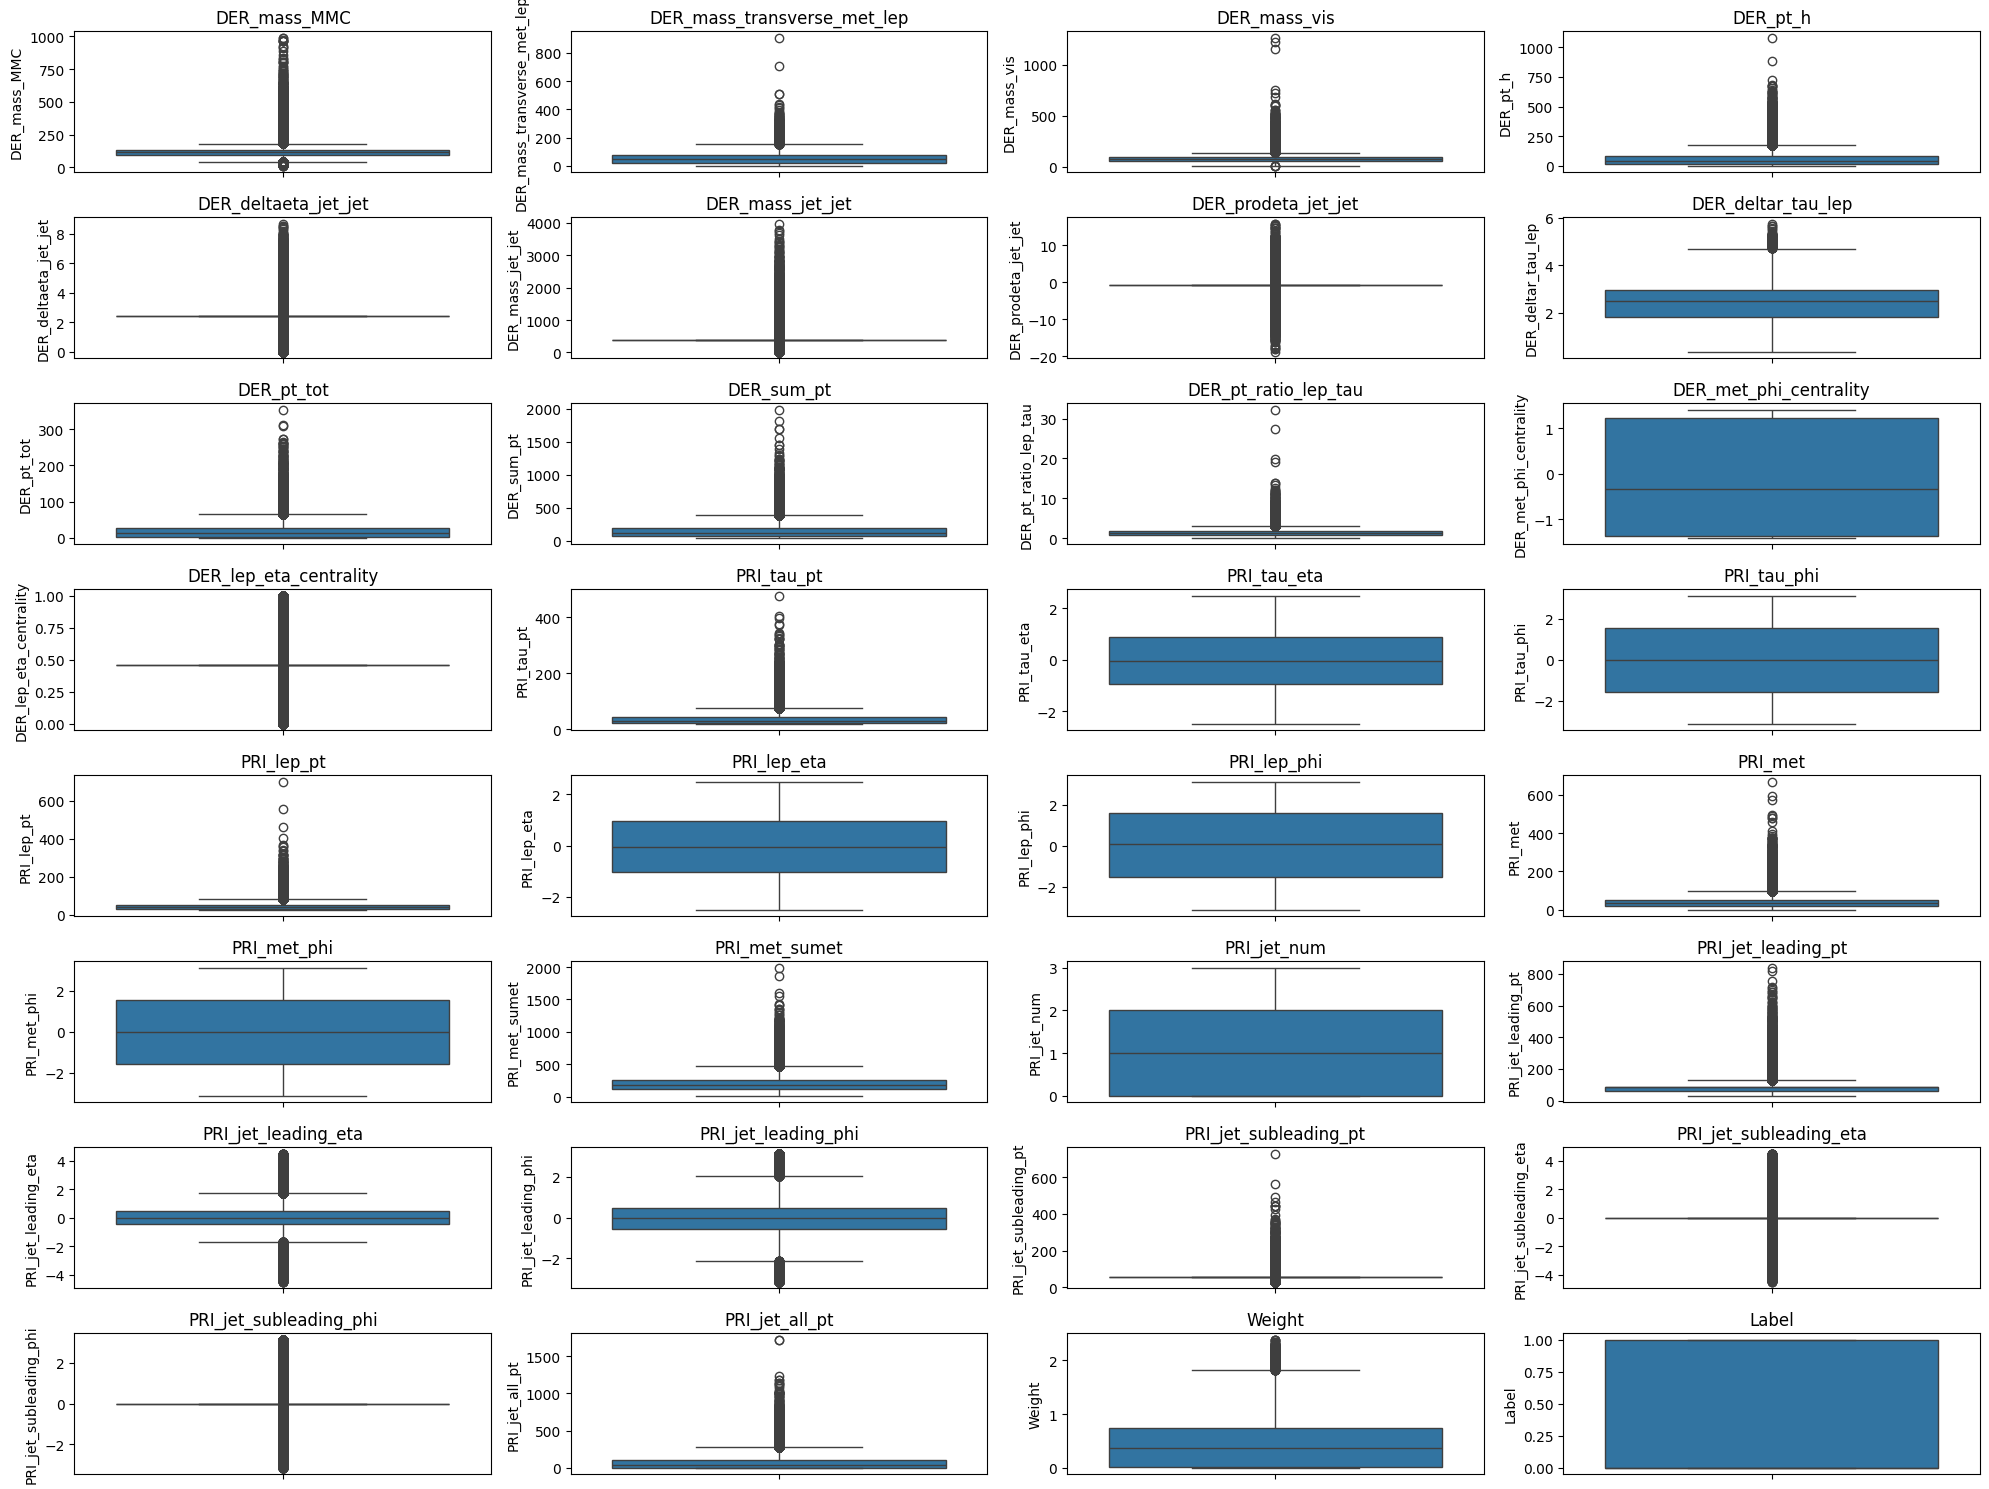

In [ ]:
from scipy import stats
import math
plt.figure(figsize=(20, 15))
for i, column in enumerate(data_imputed.columns, 1):
    plt.subplot(math.ceil(len(data_imputed.columns) / 4), 4, i)
    sns.boxplot(data_imputed[column])
    plt.title(column)
    plt.tight_layout()

Most features, such as "DER_mass_MMC" and  "DER_mass_transverse_met_lep" display significant variability, with many outliers indicating extreme values beyond the interquartile range.

Certain features, such as "PRI_tau_eta" and "PRI_lep_eta," show symmetric distributions without visible outliers, suggesting stable and well-measured pseudorapidity values for the particles. Conversely, variables like "PRI_met_sumet" and "PRI_jet_all_pt" show a wider spread and higher concentration of outliers, reflecting the complexity of energy distributions in proton-proton collisions.

### Feature Scaling

Given the significant number of outliers in our dataset, **StandardScaler** is generally a better choice because it is less sensitive to the absolute range of the data compared to **MinMaxScaler**.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X = data_imputed.drop(columns=['Label'])
y = data_imputed['Label']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [ ]:
print(X_scaled.head())

   DER_mass_MMC  DER_mass_transverse_met_lep  DER_mass_vis  DER_pt_h  \
0     -0.668156                    -0.259603     -0.607190 -0.862058   
1     -0.165203                    -0.227339     -0.116860 -0.107454   
2     -0.282092                    -0.487008     -0.132482 -0.358921   
3     -0.712181                     0.736451     -0.134484 -0.845239   
4      0.120653                    -0.597470     -0.254440  0.728591   

   DER_deltaeta_jet_jet  DER_mass_jet_jet  DER_prodeta_jet_jet  \
0              0.000000     -2.645312e-16         5.757396e-17   
1              0.000000     -2.645312e-16         5.757396e-17   
2              0.000000     -2.645312e-16         5.757396e-17   
3              0.000000     -2.645312e-16         5.757396e-17   
4             -1.996132     -1.587009e+00         7.924886e-01   

   DER_deltar_tau_lep  DER_pt_tot  DER_sum_pt  ...  PRI_met_sumet  \
0            1.008691   -0.748069   -0.881246  ...      -0.580595   
1            0.115644    1.48337

Crossing certain pairs of columns

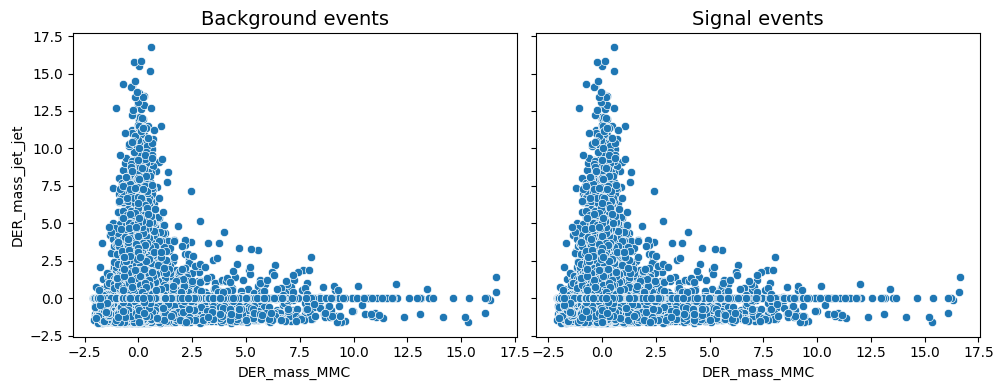

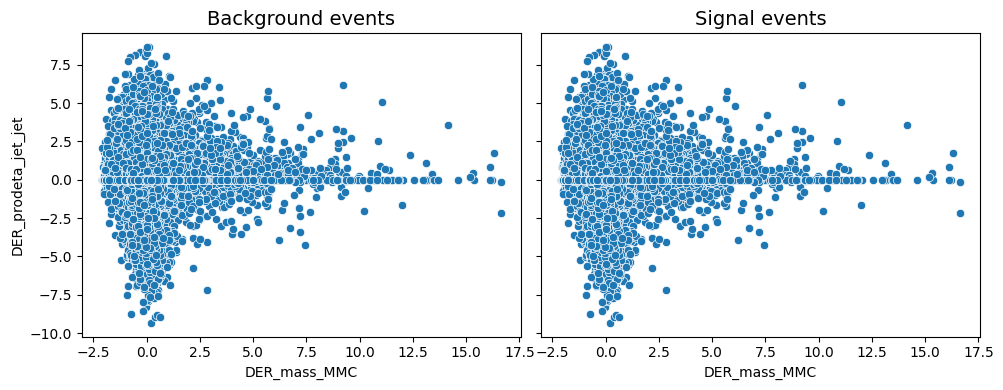

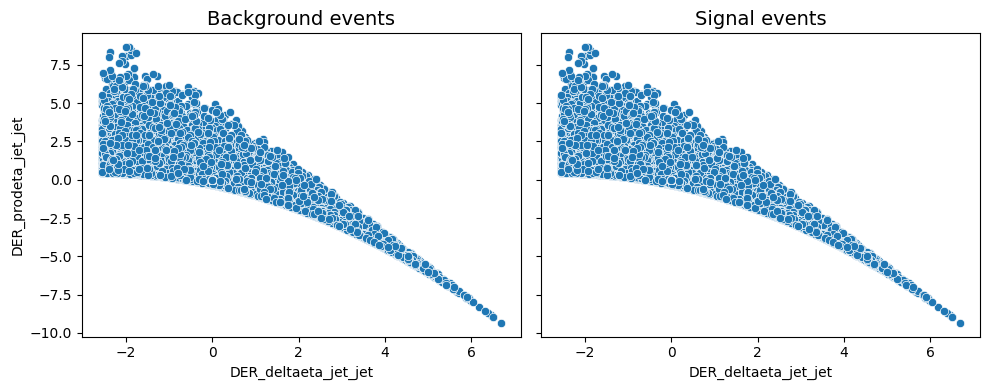

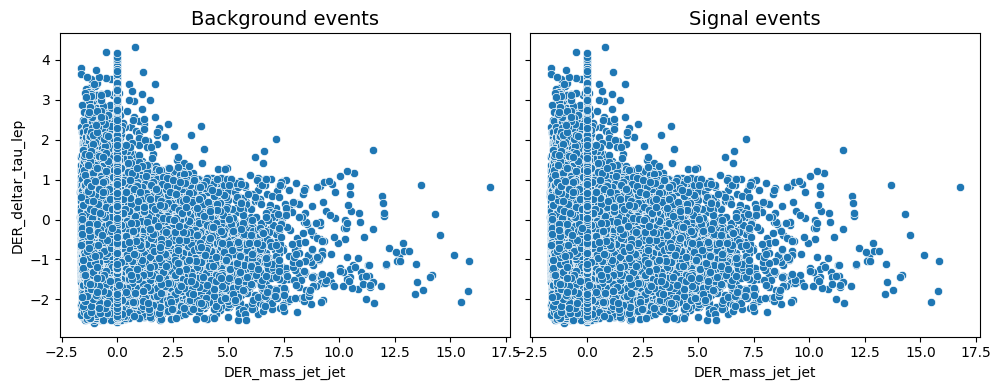

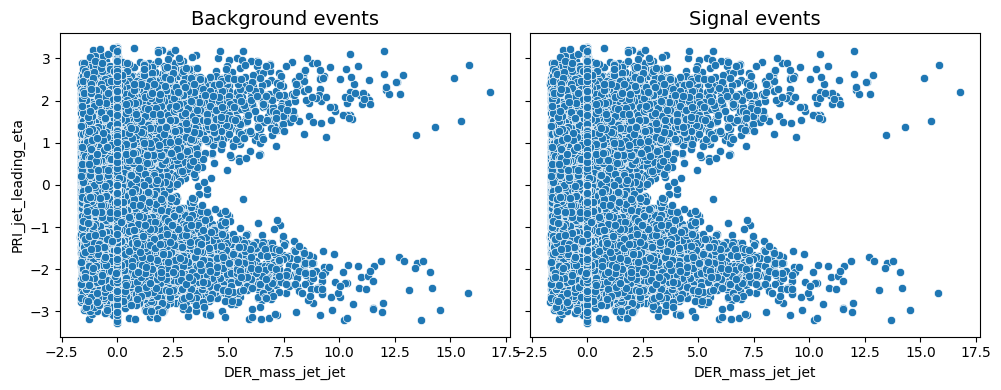

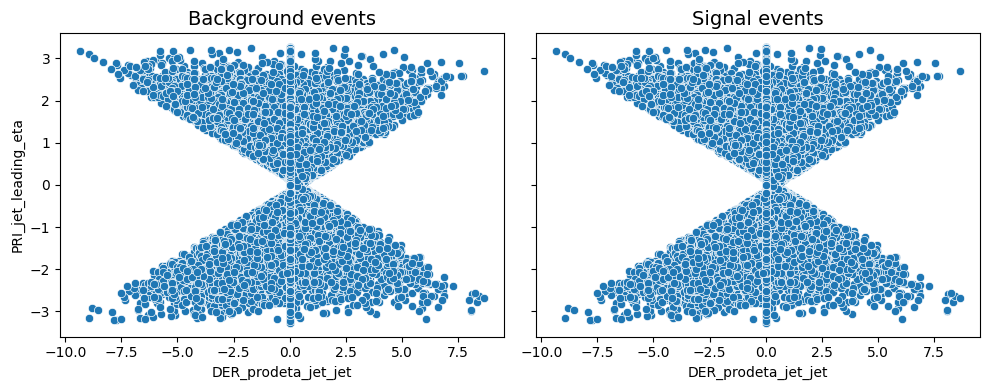

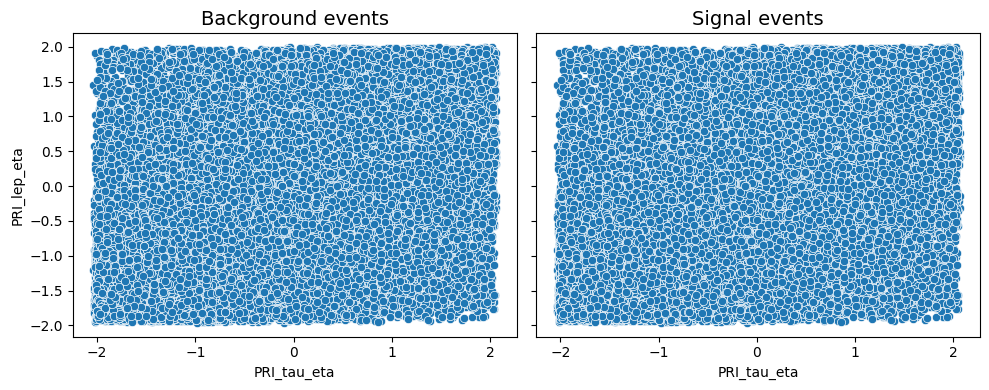

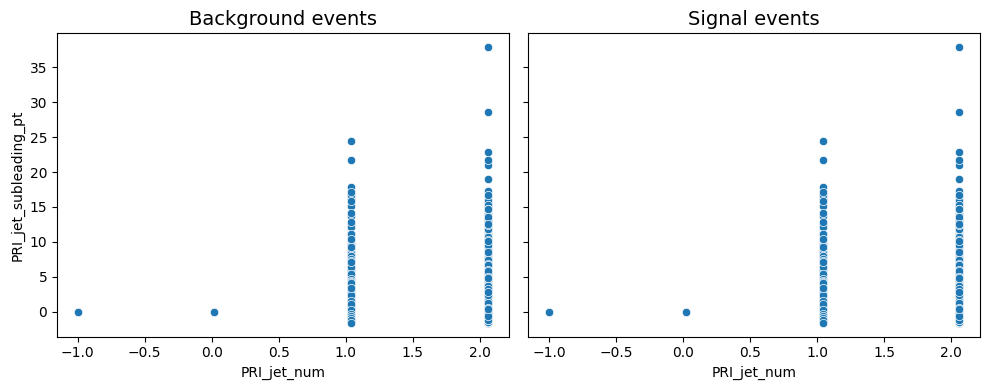

In [ ]:
pairs_selected = [
    ('DER_mass_MMC', 'DER_mass_jet_jet'),
    ('DER_mass_MMC', 'DER_prodeta_jet_jet'),
    ('DER_deltaeta_jet_jet', 'DER_prodeta_jet_jet'),
    ('DER_mass_jet_jet', 'DER_deltar_tau_lep'),
    ('DER_mass_jet_jet', 'PRI_jet_leading_eta'),
    ('DER_prodeta_jet_jet', 'PRI_jet_leading_eta'),
    ('PRI_tau_eta', 'PRI_lep_eta'),
    ('PRI_jet_num', 'PRI_jet_subleading_pt')
]
for z in pairs_selected:
    fig, ax = plt.subplots(1, 2, figsize = (10, 4), sharex = True, sharey = True)
    sns.scatterplot(data = X_scaled, x = z[0], y = z[1], ax = ax[0])
    sns.scatterplot(data = X_scaled, x = z[0], y = z[1], ax = ax[1])
    ax[0].set_title("Background events", fontsize = 14)
    ax[1].set_title("Signal events", fontsize = 14)
    plt.tight_layout()

plt.show()

Overall, these scatter plots show that both signal and background events occupy similar regions of feature space.

### Unbalance Ratio

<ipython-input-73-5a76ef76cd88>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="viridis")


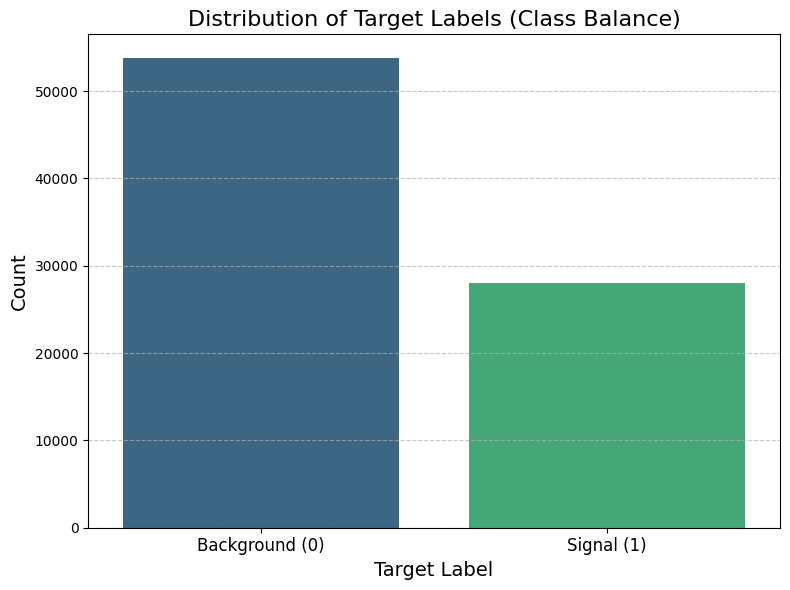

(Label
 0.0    53803
 1.0    28021
 Name: count, dtype: int64,
 0.520807389922495)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x=y, palette="viridis")
plt.title("Distribution of Target Labels (Class Balance)", fontsize=16)
plt.xlabel("Target Label", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks([0, 1], labels=["Background (0)", "Signal (1)"], fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

class_counts = y.value_counts()
imbalance_ratio = class_counts[1] / class_counts[0]
class_counts, imbalance_ratio

there are significantly more (x2) background (0) events than signal (1) events, indicating a **class imbalance** in the dataset.

### Feature Selection

**Objective:**

Reduce dimensionality to enhance model efficiency, reduce overfitting, and improve interpretability.

In [ ]:
corr_matrix = X_scaled.corr().abs()

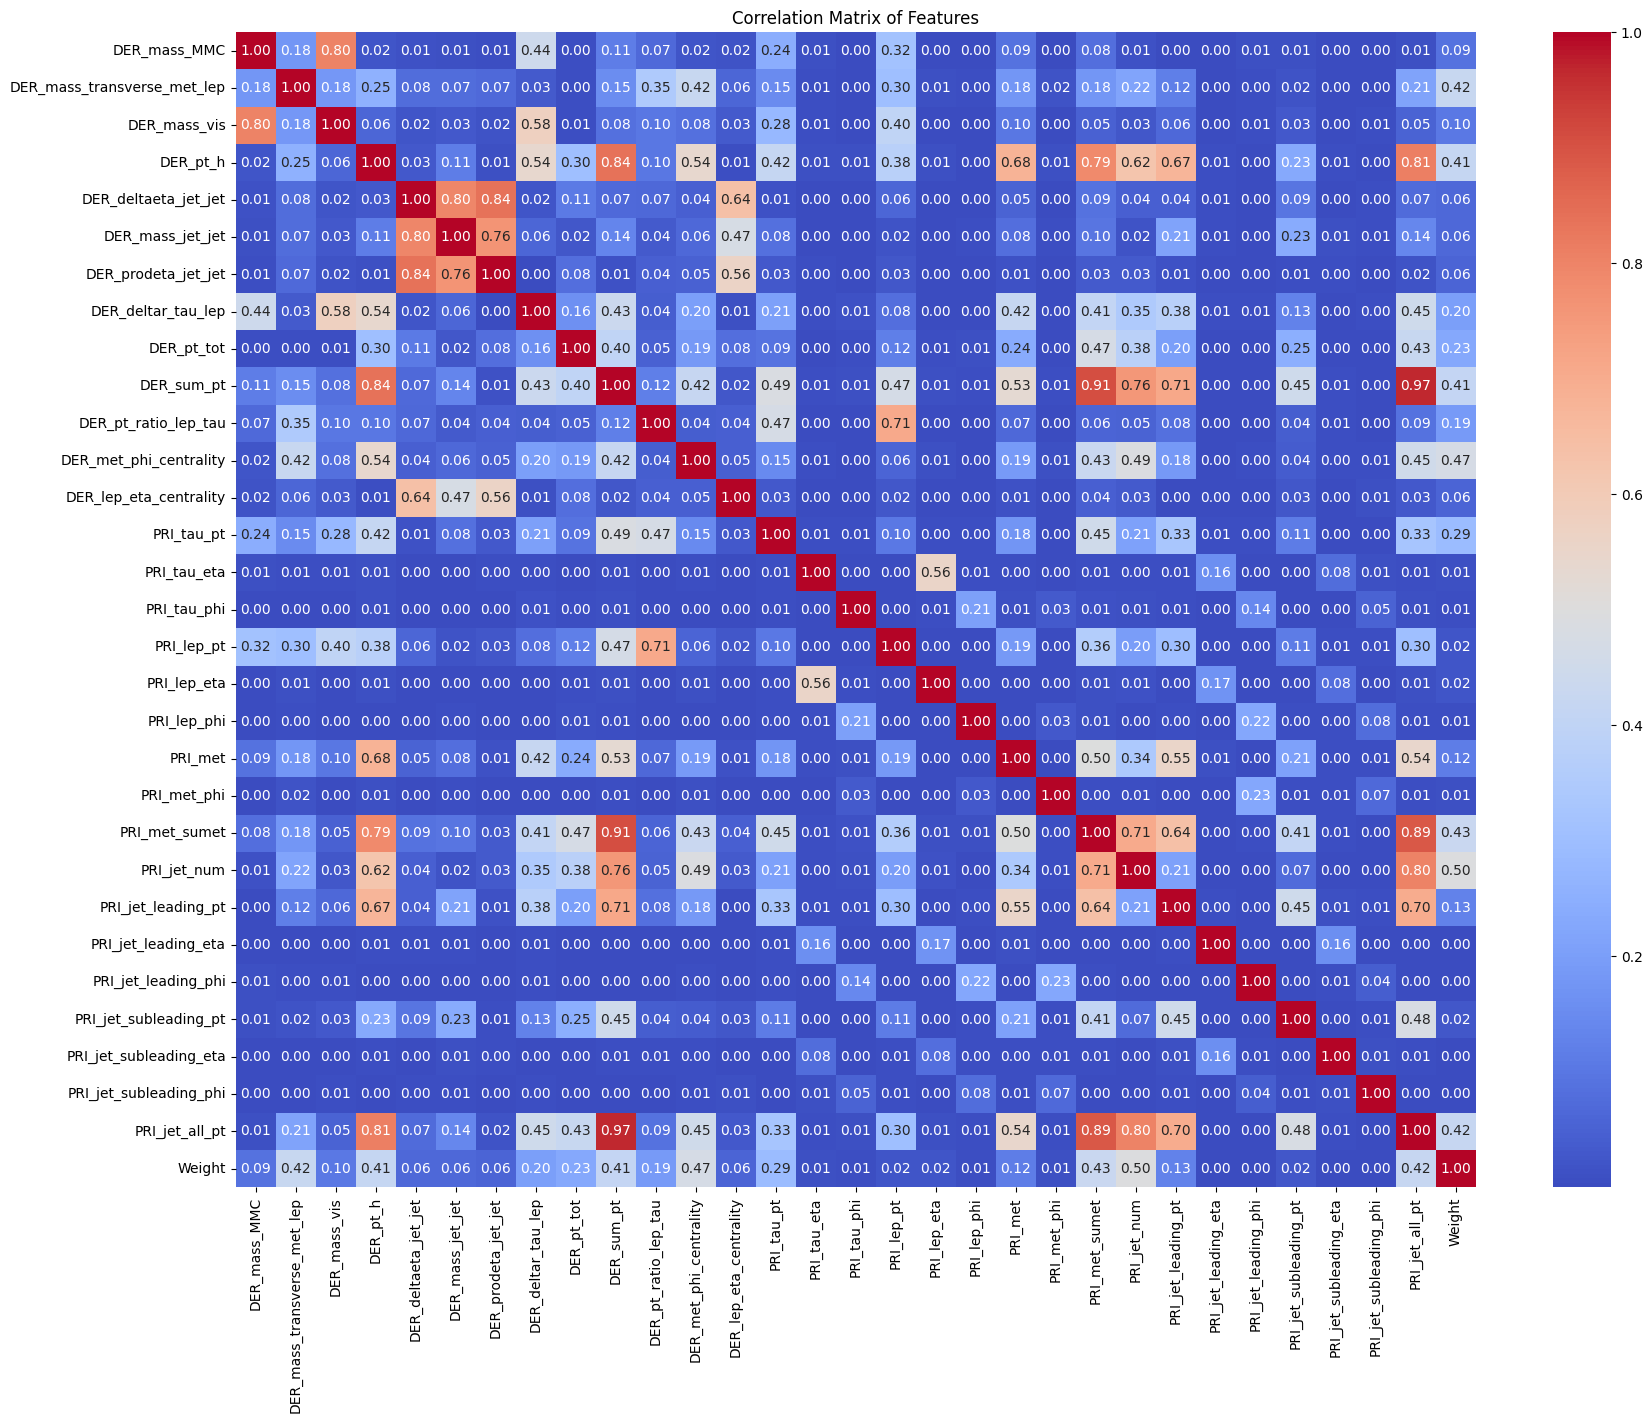

In [ ]:
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

The correlation matrix reveals that several features are highly correlated, indicating redundancy in the dataset. Specifically, "DER_deltaeta_jet_jet" and "DER_deltaeta_jet_jet" (correlation: 0.84) are strongly related. Similarly, "DER_deltaeta_jet_jet" and "DER_mass_jet_jet" show a high correlation (0.80).

In [ ]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
highly_correlated = [column for column in upper.columns if any(upper[column] > 0.95)]

print("Features highly correlated:", highly_correlated)


Features highly correlated: ['PRI_jet_all_pt']


#### PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95, random_state=42)  # we will retain 95% variance
X_pca = pca.fit_transform(X_scaled)

print(f"Number of principal components to retain 95% variance: {X_pca.shape[1]}")

Number of principal components to retain 95% variance: 21


### Split the Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_final = X_pca
y_final = y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_final,
    y_final,
    test_size=0.3,
    random_state=42,
    stratify=y_final
)
print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

Training set: 57276 samples
Testing set: 24548 samples


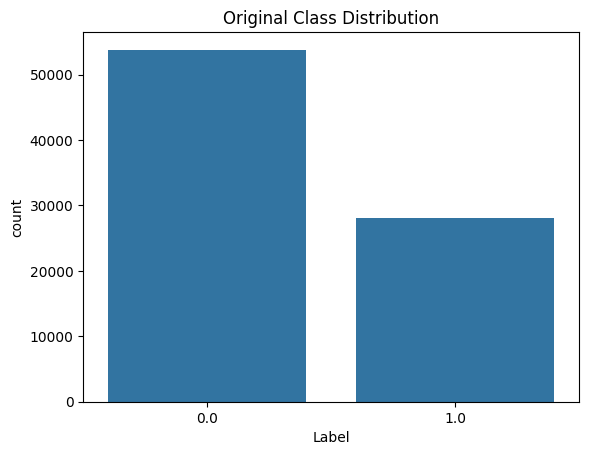

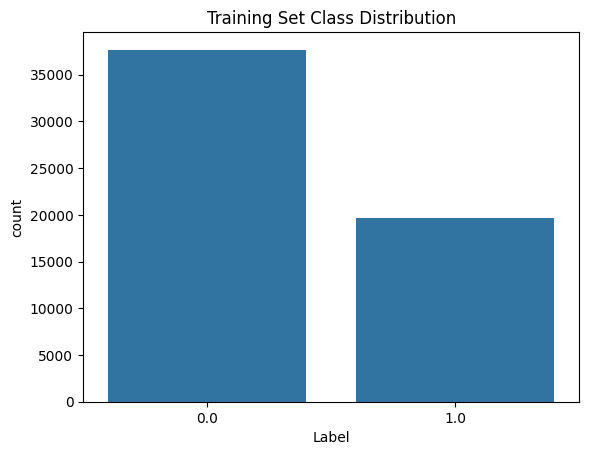

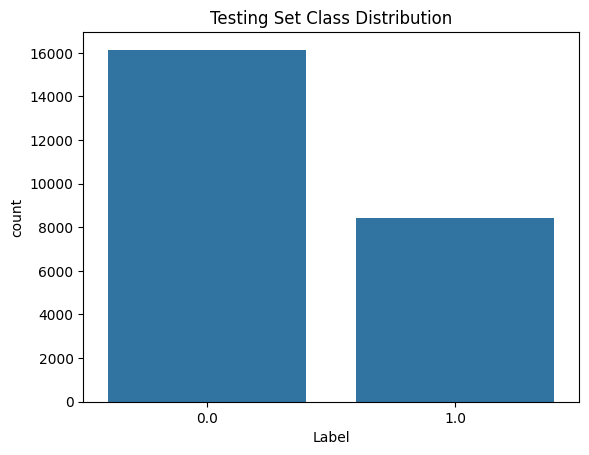

In [ ]:
def plot_class_distribution(y, title):
    sns.countplot(x=y)
    plt.title(title)
    plt.show()

plot_class_distribution(y_final, "Original Class Distribution")

plot_class_distribution(y_train, "Training Set Class Distribution")

plot_class_distribution(y_test, "Testing Set Class Distribution")

Here We wanted to make sure that the class distribution is maintained in both training and testing sets.

In [ ]:
#X_train.to_csv('X_train.csv', index=False)
#X_test.to_csv('X_test.csv', index=False)
#y_train.to_csv('y_train.csv', index=False)
#y_test.to_csv('y_test.csv', index=False)

## Ensemble Learning

Ensemble learning combines multiple individual models (often called “weak learners”) to produce a more robust final prediction. By leveraging the complementary strengths of multiple learners, ensemble methods often achieve better performance and generalization than single, stand-alone models.

#### **Bagging (Bootstrap Aggregating)**
- **Concept**: Bagging trains multiple models in parallel on different bootstrap samples (random subsamples drawn with replacement) of the training data. The final prediction is typically an average (regression) or a majority vote (classification) of all the models.
- **Benefits**:
  1. **Variance Reduction**: By averaging predictions across many de-correlated models, bagging stabilizes results and reduces variance.
  2. **Parallelizable**: Each model is trained independently, making it straightforward to scale computationally.
  3. **Robustness**: Less susceptible to noise and overfitting when using many estimators (e.g., a large forest in a Random Forest classifier).
  
#### **Boosting**
- **Concept**: Boosting trains models sequentially, where each new model focuses on correcting the errors of the previous ensemble. Over successive iterations, the ensemble “boosts” its performance by giving more weight to misclassified examples.
- **Benefits**:
  1. **Higher Accuracy**: By iteratively refining weak learners, boosting can achieve very competitive performance.
  2. **Flexibility**: Methods like XGBoost and Gradient Boosting allow sophisticated loss functions, regularization, and advanced tree-growing strategies.
  3. **Focused Learning**: The sequential nature targets the hardest-to-classify instances, often leading to improved precision/recall trade-offs.

#### Setup

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

import xgboost as xgb

!pip install imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

### Utility Function: Model Evaluation

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay)
import time

def evaluate_model(model, X_train, y_train, X_test, y_test,
                   plot_confusion_matrix=True, plot_roc_curve=True, sampling_name="None"):
    """
    Trains the given model on (X_train, y_train), makes predictions on X_test,
    and calculates common classification metrics, including training time and testing time.
    Optionally plots a confusion matrix and an ROC curve (if the model supports predict_proba).

    Parameters
    ----------
    model : estimator object
        The machine learning model to be trained and evaluated.
    X_train : array-like of shape (n_samples, n_features)
        Training feature matrix.
    y_train : array-like of shape (n_samples,)
        Training target vector.
    X_test : array-like of shape (n_samples, n_features)
        Test feature matrix.
    y_test : array-like of shape (n_samples,)
        Test target vector.
    plot_confusion_matrix : bool, optional (default=True)
        If True, plots a confusion matrix for the predictions on the test set.
    plot_roc_curve : bool, optional (default=True)
        If True, plots an ROC curve for the test set, provided the model has a `predict_proba` method.
    sampling_name : str, optional (default="None")
        Name of the sampling method used.

    Returns
    -------
    metrics_dict : dict
        A dictionary containing:
        - 'accuracy'
        - 'precision'
        - 'recall'
        - 'f1_score'
        - 'training_time': time (in seconds) to fit the model
        - 'testing_time': time (in seconds) to predict on the test set
    """
    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    # Measure testing (prediction) time
    test_start_time = time.time()
    y_pred = model.predict(X_test)
    testing_time = time.time() - test_start_time

    # Compute classification metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    metrics_dict = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'training_time': training_time,
        'testing_time': testing_time
    }

    if plot_confusion_matrix:
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)

        plt.figure(figsize=(6, 5))
        disp.plot(cmap='Blues', values_format='d')
        plt.title(f'Confusion Matrix: {type(model).__name__} (Sampling: {sampling_name})')
        plt.show()

    if plot_roc_curve and hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)[:, 1]

        plt.figure(figsize=(6, 5))
        RocCurveDisplay.from_predictions(y_test, y_scores)
        plt.title(f'ROC Curve: {type(model).__name__} (Sampling: {sampling_name})')
        plt.show()

    return metrics_dict


We want to experiment with different sampling methods on the training set. This why , we'll define a dictionary that maps each sampling strategy to a function that transforms (X_train, y_train).

### Sampling Methods

In machine learning, especially in classification tasks with imbalanced datasets, addressing class imbalance is crucial for building robust and unbiased models. The following sampling strategies are employed to balance the class distribution in the training data:

### **1. UnderSampling**
- **Description:**  
  It reduces the number of instances in the majority class to match the minority class, thereby balancing the class distribution.
  
- **Use Case:**  
  Effective when you have a large surplus of majority class samples and can afford to discard some without losing significant information.
  
- **Pros:**
  - Reduces training time by decreasing the dataset size.
  - Helps mitigate class imbalance, improving model sensitivity to the minority class.
  
- **Cons:**
  - Potential loss of important information by removing data points from the majority class.
  - May lead to underfitting if too much data is discarded.

### **2. OverSampling**
- **Description:**  
  It increases the number of instances in the minority class by duplicating existing samples until the class distribution is balanced.
  
- **Use Case:**  
  Useful when the minority class has valuable information that should be retained and the dataset is not excessively large.
  
- **Pros:**
  - Balances class distribution without losing any information.
  - Simple to implement and understand.
  
- **Cons:**
  - Can lead to overfitting since it duplicates existing minority class samples.
  - Increases training time due to the larger dataset size.

### **3. SMOTE (Synthetic Minority Over-sampling Technique)**
- **Description:**  
  It generates synthetic samples for the minority class by interpolating between existing minority instances, creating new, plausible examples.
  
- **Use Case:**  
  Ideal for situations where simply duplicating minority class samples (as in OverSampling) might lead to overfitting. SMOTE introduces variability without relying on existing samples.
  
- **Pros:**
  - Reduces the risk of overfitting compared to simple OverSampling by creating diverse synthetic examples.
  - Improves model generalization by expanding the decision boundary for the minority class.
  
- **Cons:**
  - Can introduce noise if synthetic samples are not representative.
  - May not be effective in very high-dimensional spaces due to the curse of dimensionality.


In [ ]:
sampling_strategies = {
    "None": None,
    "UnderSampling": RandomUnderSampler(random_state=42),
    "OverSampling": RandomOverSampler(random_state=42),
    "SMOTE": SMOTE(random_state=42)
}

We’ll compare a mix of Bagging, Boosting, and simple classifiers:

- RandomForestClassifier (Bagging)
- XGBClassifier (Boosting)
- GradientBoostingClassifier (Boosting)
- LogisticRegression
- GaussianNB (Naive Bayes)

### **Classifier Candidates**

### **1. RandomForestClassifier (Bagging)**
- **Description:**  
  The `RandomForestClassifier` is an ensemble learning method that constructs multiple decision trees during training and outputs the mode of the classes (classification) of the individual trees. It leverages the bagging (Bootstrap Aggregating) technique to improve the stability and accuracy of machine learning algorithms.
  
- **Key Features:**
  - **Ensemble of Trees:** Combines the predictions of several decision trees to reduce overfitting and improve generalization.
  - **Feature Randomness:** Introduces randomness by selecting a random subset of features for splitting at each node, enhancing diversity among trees.
  - **Robustness:** Handles large datasets with higher dimensionality and maintains performance even when some features are irrelevant.

### **2. XGBoostClassifier (Boosting)**
- **Description:**  
  `XGBoost` (Extreme Gradient Boosting) is an optimized distributed gradient boosting library designed to be highly efficient, flexible, and portable. It implements machine learning algorithms under the Gradient Boosting framework with a focus on speed and performance.
  
- **Key Features:**
  - **Gradient Boosting Framework:** Builds models sequentially, where each new model attempts to correct the errors of the previous ones.
  - **Regularization:** Incorporates L1 and L2 regularization to prevent overfitting.
  - **Handling Missing Values:** Automatically handles missing data without the need for imputation.
  - **Parallel Processing:** Efficiently utilizes computational resources by parallelizing tree construction.

### **3. GradientBoostingClassifier (Boosting)**
- **Description:**  
  The `GradientBoostingClassifier` is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. It builds the model in a stage-wise fashion and generalizes them by allowing optimization of an arbitrary differentiable loss function.
  
- **Key Features:**
  - **Stage-wise Additive Modeling:** Sequentially adds models to correct the errors made by existing models.
  - **Flexibility:** Supports various loss functions and provides the ability to fine-tune model parameters.
  - **Regularization Parameters:** Includes options like learning rate and subsampling to control overfitting.

### **4. GaussianNB (Naive Bayes)**
- **Description:**  
  The `GaussianNB` classifier implements the Gaussian Naive Bayes algorithm, which assumes that the continuous values associated with each feature are distributed according to a Gaussian (normal) distribution.
  
- **Key Features:**
  - **Probabilistic Model:** Based on Bayes’ theorem with strong (naive) independence assumptions between features.
  - **Speed:** Extremely fast to train and predict, suitable for large-scale datasets.
  - **Handling of Continuous Data:** Specifically tailored for continuous features assuming Gaussian distribution.

In [ ]:
classifiers = {
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBClassifier(
      n_estimators=100,
      learning_rate=0.1,
      max_depth=6,
      use_label_encoder=False,
      eval_metric='logloss',
      random_state=42,
      tree_method='gpu_hist',
      predictor='gpu_predictor'
    ),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "NaiveBayes": GaussianNB()
}

### Training, Predicting, and Storing Results

<Figure size 600x500 with 0 Axes>

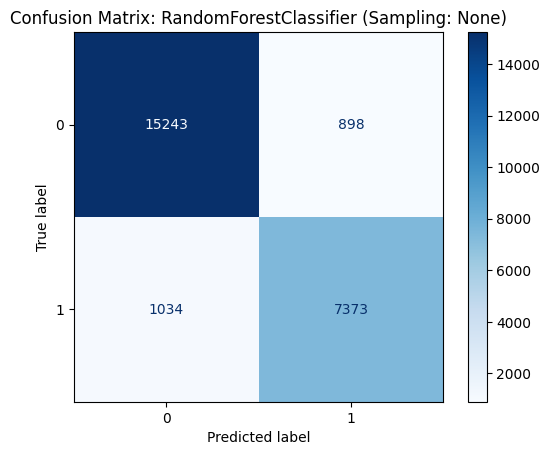

<Figure size 600x500 with 0 Axes>

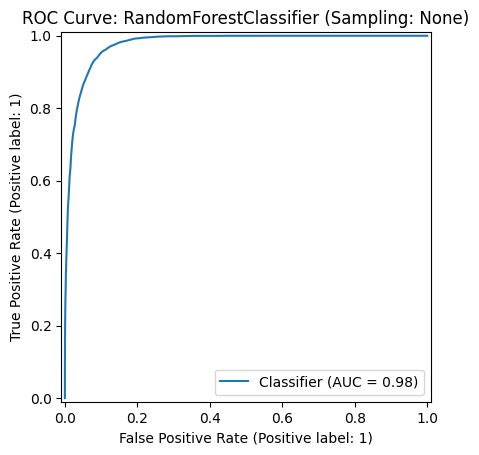

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:27:26] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:27:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:27:27] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:27:27] WARNING: /workspac

<Figure size 600x500 with 0 Axes>

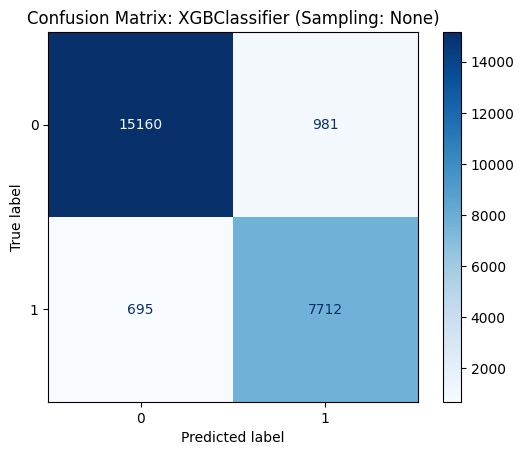

<Figure size 600x500 with 0 Axes>

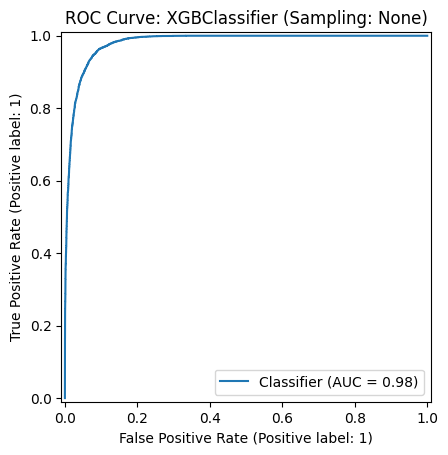

<Figure size 600x500 with 0 Axes>

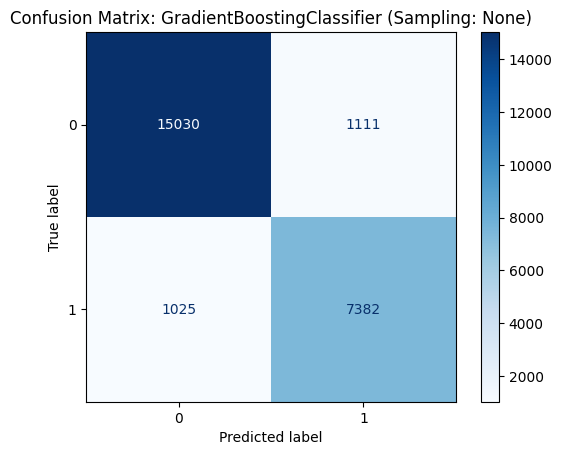

<Figure size 600x500 with 0 Axes>

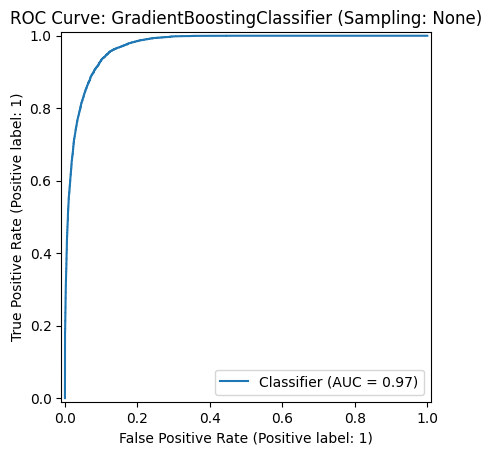

<Figure size 600x500 with 0 Axes>

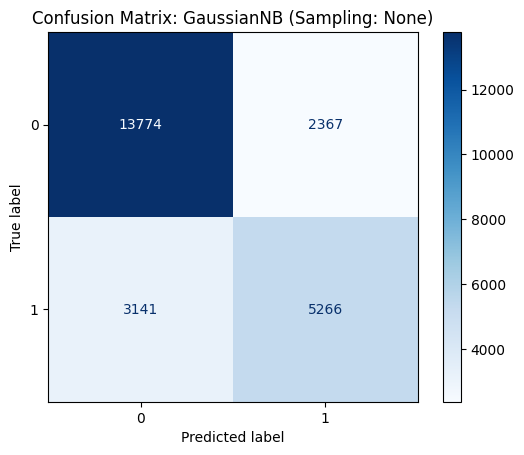

<Figure size 600x500 with 0 Axes>

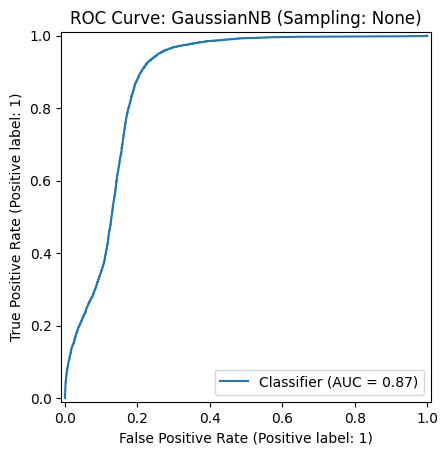

<Figure size 600x500 with 0 Axes>

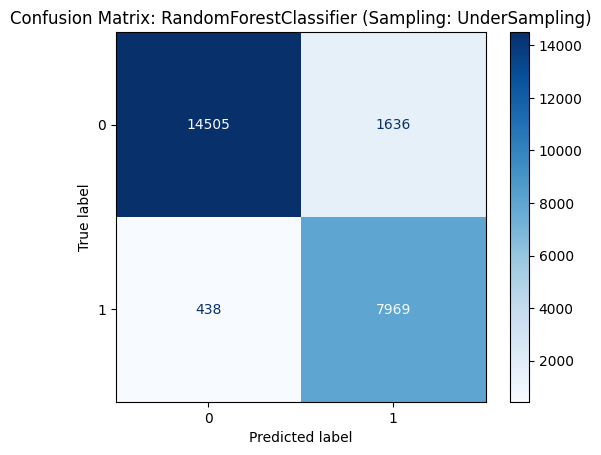

<Figure size 600x500 with 0 Axes>

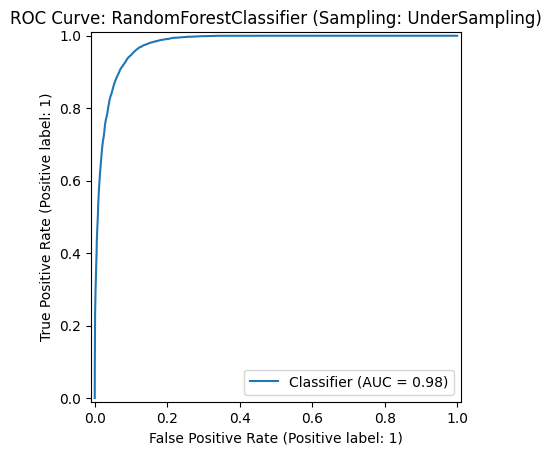

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:28:59] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:28:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:29:00] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


<Figure size 600x500 with 0 Axes>

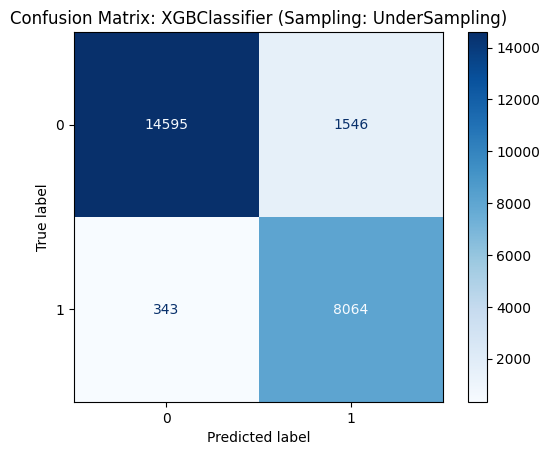

<Figure size 600x500 with 0 Axes>

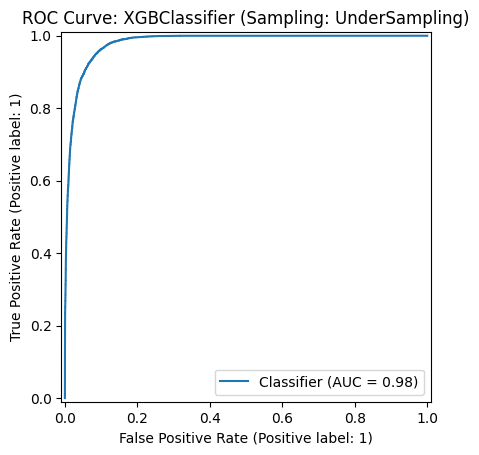

<Figure size 600x500 with 0 Axes>

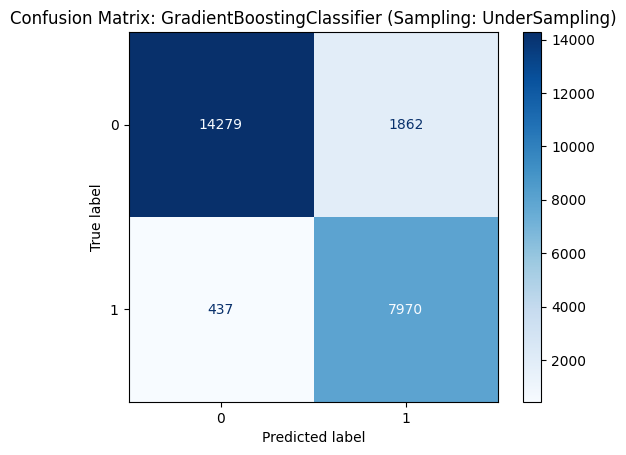

<Figure size 600x500 with 0 Axes>

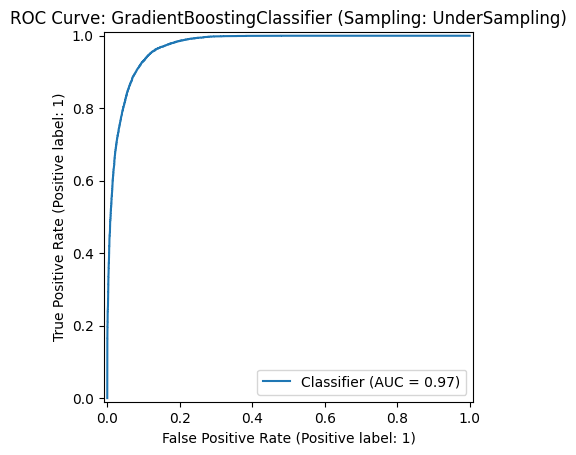

<Figure size 600x500 with 0 Axes>

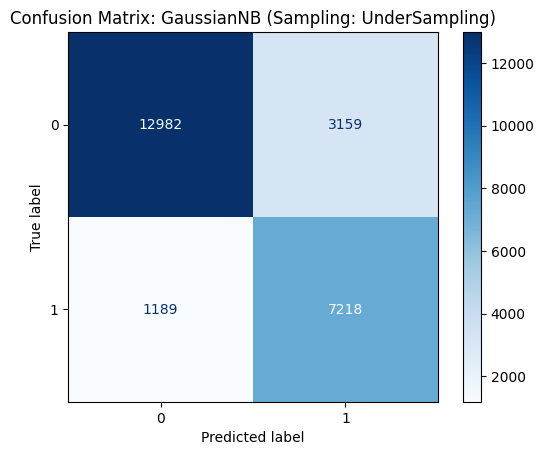

<Figure size 600x500 with 0 Axes>

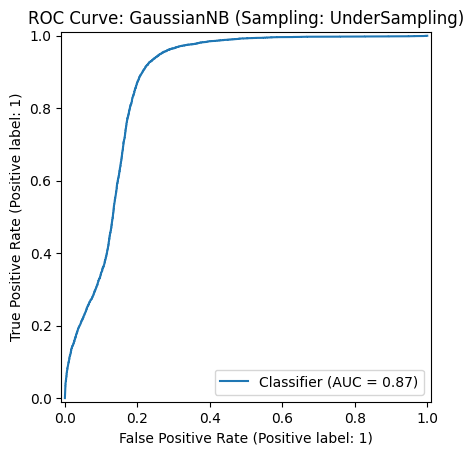

<Figure size 600x500 with 0 Axes>

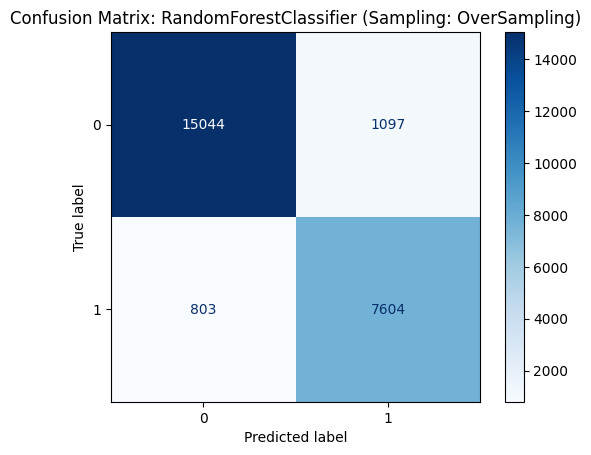

<Figure size 600x500 with 0 Axes>

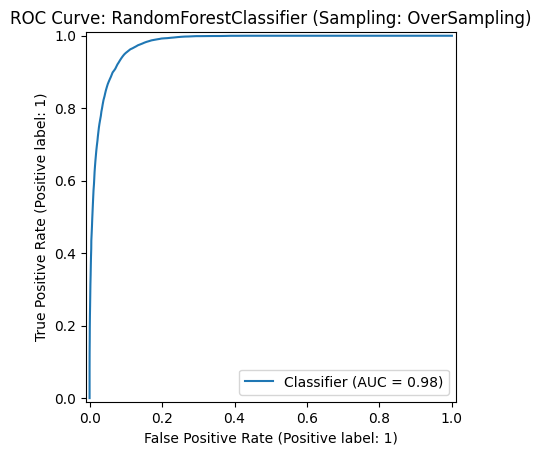

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:30:31] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:30:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


<Figure size 600x500 with 0 Axes>

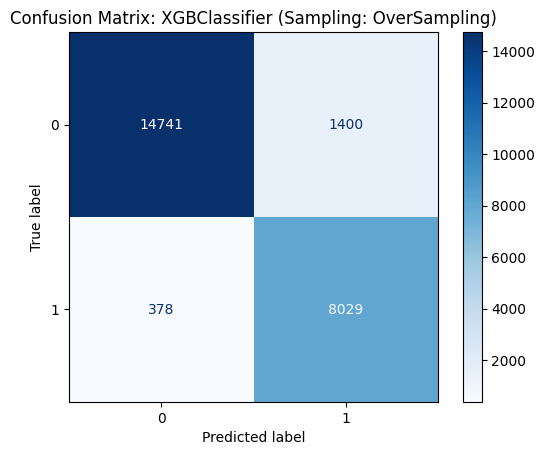

<Figure size 600x500 with 0 Axes>

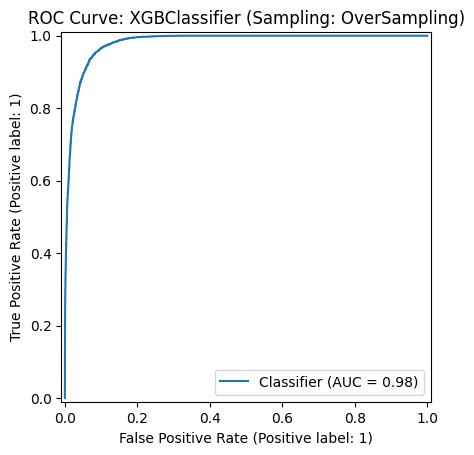

<Figure size 600x500 with 0 Axes>

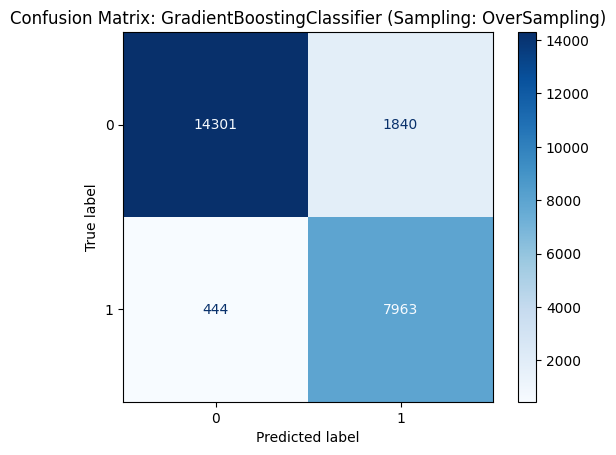

<Figure size 600x500 with 0 Axes>

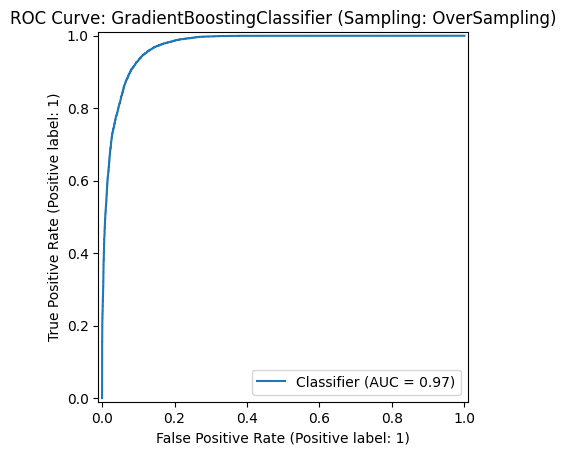

<Figure size 600x500 with 0 Axes>

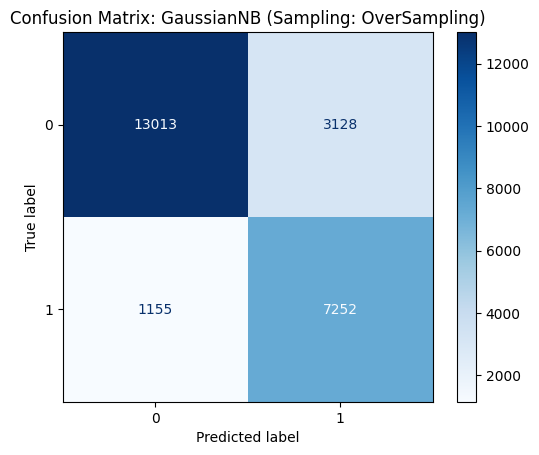

<Figure size 600x500 with 0 Axes>

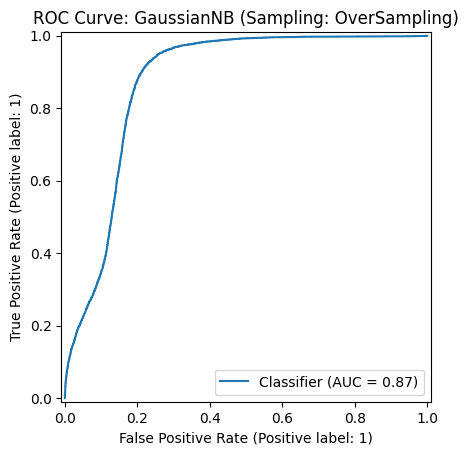

<Figure size 600x500 with 0 Axes>

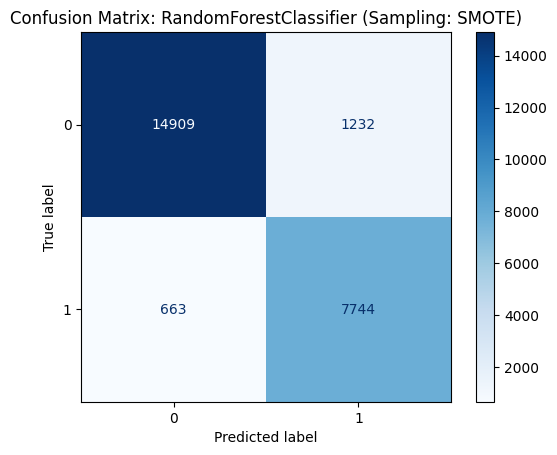

<Figure size 600x500 with 0 Axes>

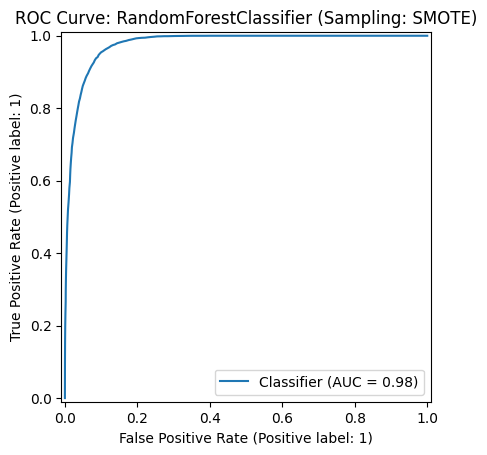

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:32:46] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:32:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


<Figure size 600x500 with 0 Axes>

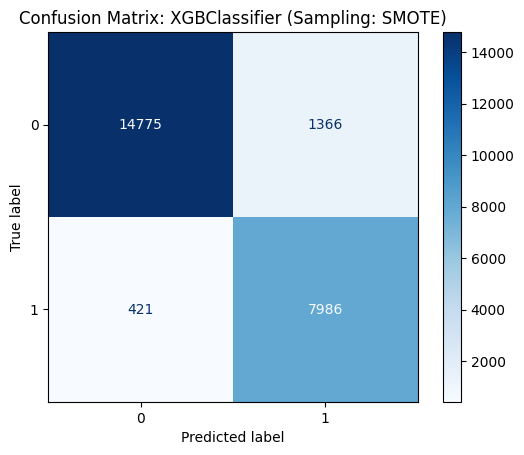

<Figure size 600x500 with 0 Axes>

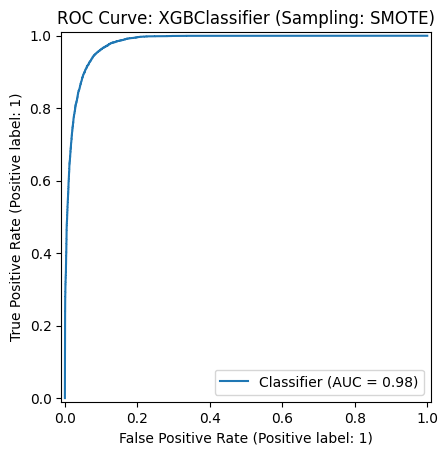

<Figure size 600x500 with 0 Axes>

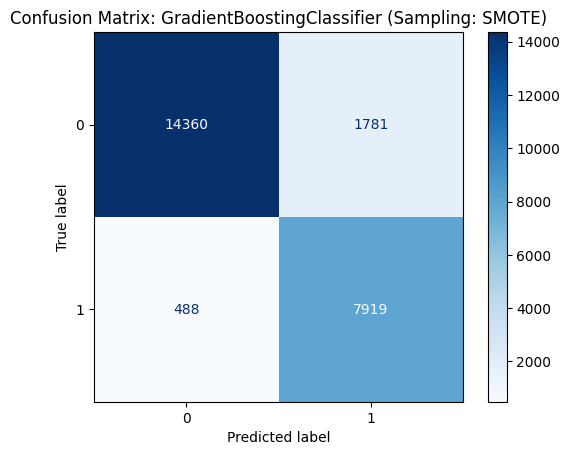

<Figure size 600x500 with 0 Axes>

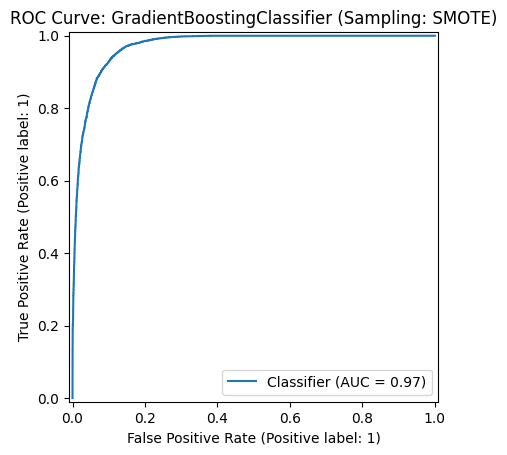

<Figure size 600x500 with 0 Axes>

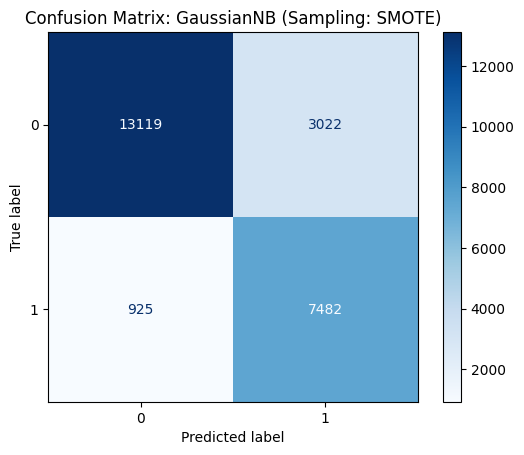

<Figure size 600x500 with 0 Axes>

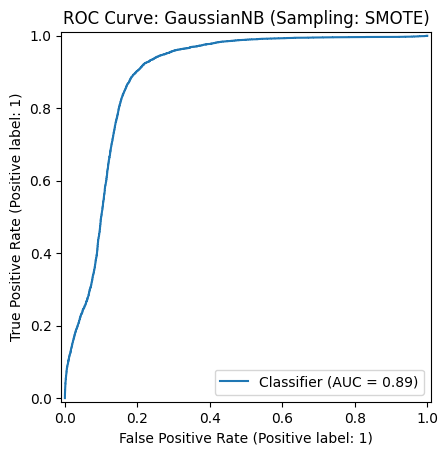

In [ ]:
results_list = []

for sampling_name, sampler in sampling_strategies.items():
    if sampler is not None:
        X_train_resampled, y_train_resampled = sampler.fit_resample(X_train, y_train)
    else:
        X_train_resampled, y_train_resampled = X_train, y_train

    for clf_name, clf in classifiers.items():
        metrics = evaluate_model(clf, X_train_resampled, y_train_resampled, X_test, y_test,plot_confusion_matrix=True,plot_roc_curve=True,sampling_name=sampling_name)

        result = {
            'Sampling': sampling_name,
            'Classifier': clf_name,
            'Accuracy': metrics['accuracy'],
            'Precision': metrics['precision'],
            'Recall': metrics['recall'],
            'F1': metrics['f1_score'],
            'TrainingTime': metrics['training_time'],
            'TestingTime': metrics['testing_time']
        }
        results_list.append(result)

results_df = pd.DataFrame(results_list)

In [ ]:
pd.to_pickle(results_df, 'results_df.pkl')

In [ ]:
print(results_df)

         Sampling        Classifier  Accuracy  Precision    Recall        F1  \
0            None      RandomForest  0.921297   0.891428  0.877007  0.884159   
1            None           XGBoost  0.931726   0.887151  0.917331  0.901988   
2            None  GradientBoosting  0.912987   0.869186  0.878078  0.873609   
3            None        NaiveBayes  0.775623   0.689899  0.626383  0.656608   
4   UnderSampling      RandomForest  0.915512   0.829672  0.947901  0.884855   
5   UnderSampling           XGBoost  0.923049   0.839126  0.959201  0.895155   
6   UnderSampling  GradientBoosting  0.906347   0.810618  0.948020  0.873951   
7   UnderSampling        NaiveBayes  0.822878   0.695577  0.858570  0.768526   
8    OverSampling      RandomForest  0.922601   0.873923  0.904484  0.888941   
9    OverSampling           XGBoost  0.927570   0.851522  0.955037  0.900314   
10   OverSampling  GradientBoosting  0.906958   0.812302  0.947187  0.874574   
11   OverSampling        NaiveBayes  0.8

In [ ]:
!pip install plotly

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

def compare_models_plots(results_df):
    """
    Generates comparative plots (line, bar, etc.) for classifier performance using Plotly.

    Parameters
    ----------
    results_df : pd.DataFrame
        A DataFrame containing the columns:
        - 'Sampling': The sampling method used (e.g., None, UnderSampling, OverSampling, SMOTE)
        - 'Classifier': The name of the classifier (e.g., RandomForest, XGBoost, etc.)
        - 'Accuracy', 'Precision', 'Recall', 'F1', 'TrainingTime': Performance metrics and training time.

    Notes
    -----
    This function creates:
    1. A line plot of F1-Score vs. Classifier with Sampling as the color grouping.
    2. A bar plot of F1-Score vs. Classifier grouped by Sampling.
    3. A line plot of Accuracy vs. Classifier with Sampling as the color grouping.
    4. A line plot of Training Time vs. Classifier with Sampling as the color grouping.
    5. A line plot of Testing Time vs. Classifier with Sampling as the color grouping.
    """

    # 1. Line Plot: F1-Score vs. Classifier, color by Sampling
    fig_line = px.line(
        results_df,
        x='Classifier',
        y='F1',
        color='Sampling',
        markers=True,
        title="Line Plot of F1 Score by Classifier and Sampling Method"
    )
    fig_line.update_layout(legend_title_text='Sampling Method')
    fig_line.show()

    # 2. Bar Plot: F1-Score vs. Classifier, grouped by Sampling
    fig_bar = px.bar(
        results_df,
        x='Classifier',
        y='F1',
        color='Sampling',
        barmode='group',
        title="Bar Chart of F1 Score by Classifier and Sampling Method"
    )
    fig_bar.update_layout(legend_title_text='Sampling Method')
    fig_bar.show()

    # 3. Line Plot: Accuracy vs. Classifier, color by Sampling
    fig_line_acc = px.line(
        results_df,
        x='Classifier',
        y='Accuracy',
        color='Sampling',
        markers=True,
        title="Line Plot of Accuracy by Classifier and Sampling Method"
    )
    fig_line_acc.update_layout(legend_title_text='Sampling Method')
    fig_line_acc.show()

    # 4. Line Plot: Training Time vs. Classifier, color by Sampling
    fig_line_time = px.line(
        results_df,
        x='Classifier',
        y='TrainingTime',
        color='Sampling',
        markers=True,
        title="Line Plot of Training Time by Classifier and Sampling Method"
    )
    fig_line_time.update_layout(
        legend_title_text='Sampling Method',
        yaxis_title="Training Time (seconds)"
    )
    fig_line_time.show()
    # 5. Line Plot: Testing Time vs. Classifier, color by Sampling
    fig_line_time = px.line(
        results_df,
        x='Classifier',
        y='TestingTime',
        color='Sampling',
        markers=True,
        title="Line Plot of Testing Time by Classifier and Sampling Method"
    )
    fig_line_time.update_layout(
        legend_title_text='Sampling Method',
        yaxis_title="Testing Time (seconds)"
    )
    fig_line_time.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def compare_models_plots_mpl(results_df):
    """
    Generates comparative line and bar plots (via seaborn/matplotlib)
    for classifier performance metrics, including training time.

    Parameters
    ----------
    results_df : pd.DataFrame
        A DataFrame containing the columns:
        - 'Sampling': The sampling method used (e.g., None, UnderSampling, OverSampling, SMOTE)
        - 'Classifier': The name of the classifier (e.g., RandomForest, XGBoost, etc.)
        - 'Accuracy', 'Precision', 'Recall', 'F1', 'TrainingTime': Performance metrics and training time.

    Notes
    -----
    This function creates:
    1. A line plot of F1-Score vs. Classifier, grouped (hue) by Sampling.
    2. A bar plot of F1-Score vs. Classifier, grouped (hue) by Sampling.
    3. A line plot of Accuracy vs. Classifier, grouped (hue) by Sampling.
    4. A line plot of Training Time vs. Classifier, grouped (hue) by Sampling.
    5. A line plot of Testing Time vs. Classifier, grouped (hue) by Sampling.
    """

    sns.set_style("whitegrid")

    # 1. Line Plot: F1-Score vs. Classifier, color-coded by Sampling
    plt.figure(figsize=(8, 6))
    sns.lineplot(data=results_df, x='Classifier', y='F1', hue='Sampling', marker='o')
    plt.title("Line Plot of F1-Score by Classifier and Sampling Method")
    plt.xlabel("Classifier")
    plt.ylabel("F1-Score")
    plt.xticks(rotation=45)
    plt.legend(title='Sampling Method')
    plt.tight_layout()
    plt.show()

    # 2. Bar Plot: F1-Score vs. Classifier, grouped by Sampling
    plt.figure(figsize=(8, 6))
    sns.barplot(data=results_df, x='Classifier', y='F1', hue='Sampling')
    plt.title("Bar Chart of F1-Score by Classifier and Sampling Method")
    plt.xlabel("Classifier")
    plt.ylabel("F1-Score")
    plt.xticks(rotation=45)
    plt.legend(title='Sampling Method')
    plt.tight_layout()
    plt.show()

    # 3. Line Plot: Accuracy vs. Classifier, color-coded by Sampling
    plt.figure(figsize=(8, 6))
    sns.lineplot(data=results_df, x='Classifier', y='Accuracy', hue='Sampling', marker='o')
    plt.title("Line Plot of Accuracy by Classifier and Sampling Method")
    plt.xlabel("Classifier")
    plt.ylabel("Accuracy")
    plt.xticks(rotation=45)
    plt.legend(title='Sampling Method')
    plt.tight_layout()
    plt.show()

    # 4. Line Plot: Training Time vs. Classifier, color-coded by Sampling
    plt.figure(figsize=(8, 6))
    sns.lineplot(data=results_df, x='Classifier', y='TrainingTime', hue='Sampling', marker='o')
    plt.title("Line Plot of Training Time by Classifier and Sampling Method")
    plt.xlabel("Classifier")
    plt.ylabel("Training Time (seconds)")
    plt.xticks(rotation=45)
    plt.legend(title='Sampling Method')
    plt.tight_layout()
    plt.show()
    # 5. Line Plot: Testing Time vs. Classifier, color-coded by Sampling
    plt.figure(figsize=(8, 6))
    sns.lineplot(data=results_df, x='Classifier', y='TestingTime', hue='Sampling', marker='o')
    plt.title("Line Plot of Testing Time by Classifier and Sampling Method")
    plt.xlabel("Classifier")
    plt.ylabel("Testing Time (seconds)")
    plt.xticks(rotation=45)
    plt.legend(title='Sampling Method')
    plt.tight_layout()
    plt.show()

In [ ]:
def plot_ranked_f1_scores(results_df):
    """
    Ranks all classifier+sampling combinations by F1-Score from best to worst,
    and plots them as a bar chart.

    Parameters
    ----------
    results_df : pd.DataFrame
        A DataFrame containing at least the following columns:
        - 'Classifier' (str): Name of the classifier (e.g., 'RandomForest', 'XGBoost')
        - 'Sampling' (str): Name of the sampling method (e.g., 'None', 'SMOTE')
        - 'F1' (float): F1-Score for that (Classifier, Sampling) combo

    The function:
    1. Creates a combined label for each (Classifier, Sampling) pair.
    2. Sorts the combinations in descending order by F1-Score.
    3. Plots a bar chart showing the F1-Score for each combination, from best to worst.
    """


    results_df['ComboLabel'] = results_df['Classifier'] + " | " + results_df['Sampling'].astype(str)

    # 2. Sort by F1-Score in descending order
    df_sorted = results_df.sort_values(by='F1', ascending=False).reset_index(drop=True)

    # 3. Plot the ranked bar chart
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=df_sorted, x='ComboLabel', y='F1', hue='Sampling', dodge=False)

    # Customize the plot
    ax.set_title("Ranked Classifier + Sampling Strategies by F1-Score (Descending)")
    ax.set_xlabel("Classifier | Sampling")
    ax.set_ylabel("F1-Score")

    # Rotate x-axis labels if they are long
    plt.xticks(rotation=45, ha="right")

    # Display legend, tighten layout
    plt.legend(title='Sampling Method', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


In [ ]:
compare_models_plots(results_df)

As a fallback, the plots are also generated using matplotlib in case Plotly is unavailable or encounters issues.

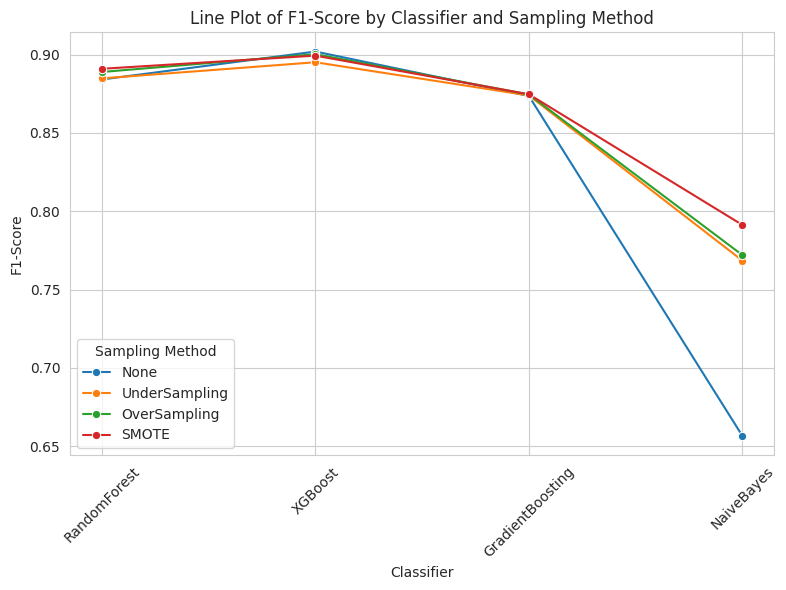

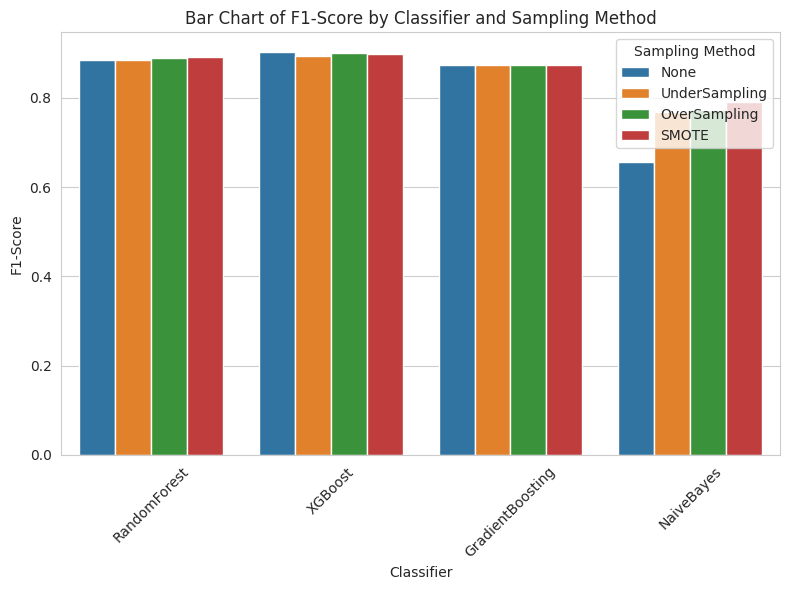

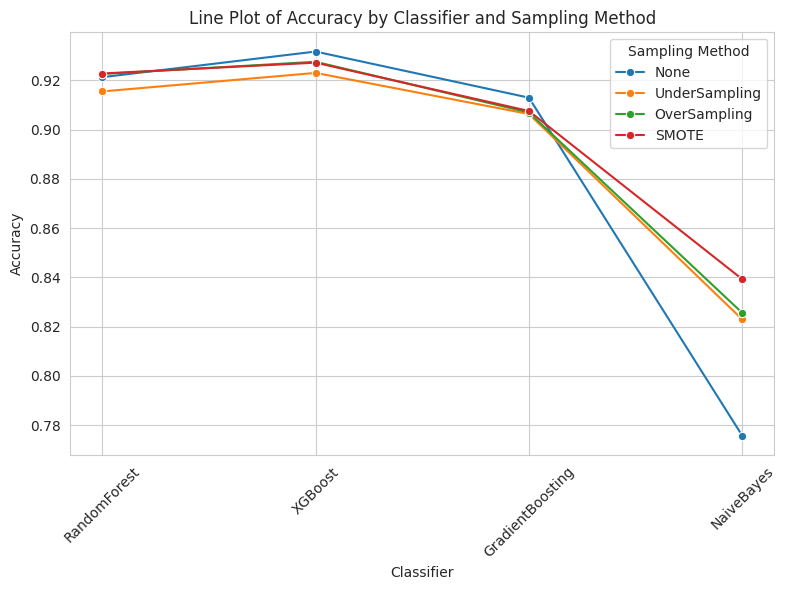

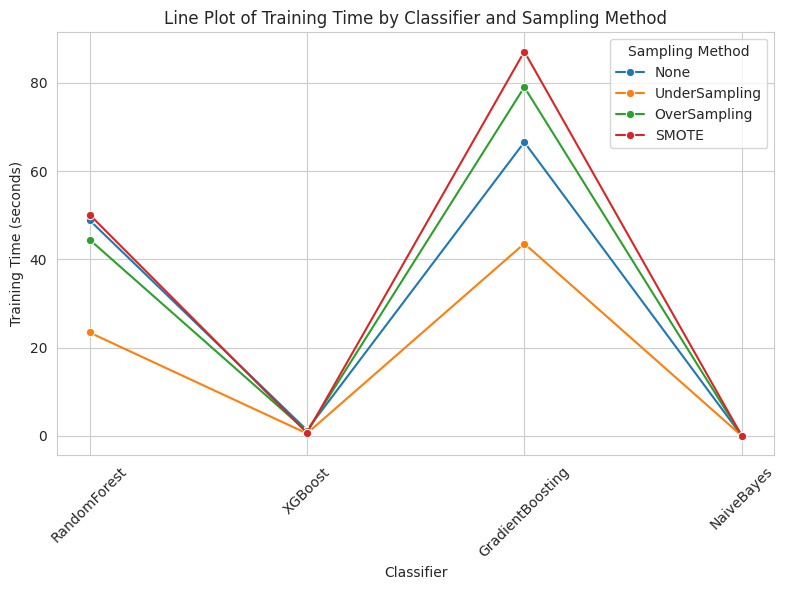

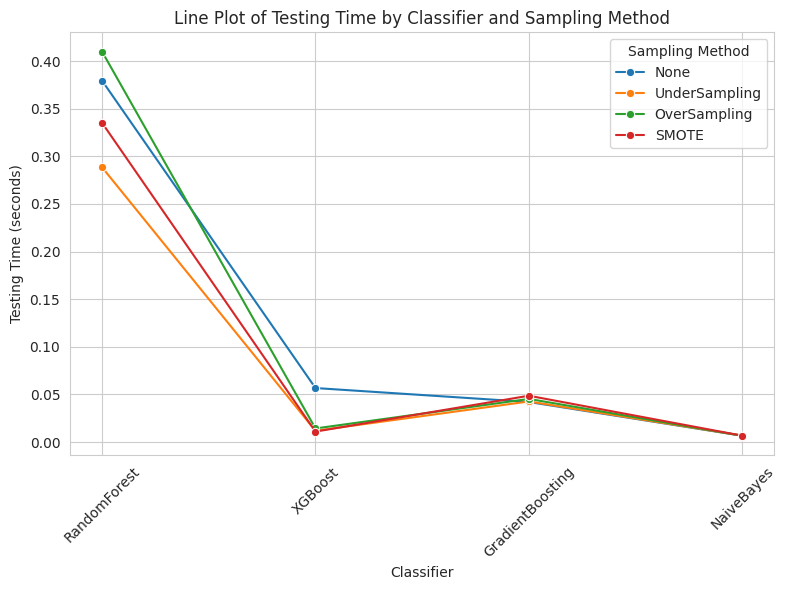

In [ ]:
compare_models_plots_mpl(results_df)

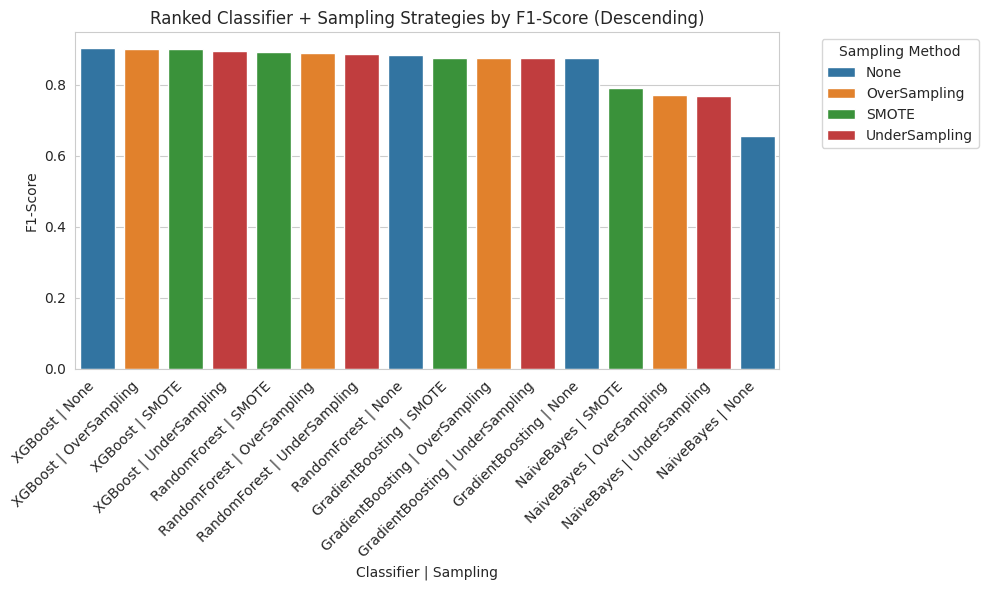

In [ ]:
plot_ranked_f1_scores(results_df)

The line plots of F1-Score and Accuracy reveal that XGBoost consistently achieves the highest scores, closely followed by Random Forest and Gradient Boosting. Across all sampling methods (None, UnderSampling, OverSampling, and SMOTE), Naive Bayes performs significantly worse in both F1-Score and Accuracy, highlighting its challenges with this dataset compared to the tree-based ensemble methods.

Interestingly, sampling strategies—particularly SMOTE and OverSampling—often result in only marginal improvements or outcomes similar to the "None" condition for XGBoost, Random Forest, and Gradient Boosting. This suggests that these ensemble algorithms, especially boosting methods, are inherently robust to moderate dataset imbalances. In contrast, Naive Bayes benefits more from sampling techniques but still lags behind the ensemble classifiers. This underscores the limitations of its assumptions, such as feature independence and **Gaussian distributions**, which reduce its effectiveness for this problem.

The ranked bar chart confirms that XGBoost (with either no sampling or SMOTE) achieves the highest F1-Score, reaffirming that boosting methods are particularly effective for complex classification tasks like Higgs Boson detection. Random Forest with SMOTE and OverSampling follows closely, demonstrating the strong performance of bagging methods. Gradient Boosting remains competitive but typically trails slightly behind XGBoost in these experiments.

The training time plot highlights notable differences in computational cost among these methods. Gradient Boosting tends to have the longest training time—especially when the dataset is augmented with SMOTE or OverSampling—due to the iterative nature of its tree-building process. Random Forest exhibits moderate training times across all sampling strategies, while Naive Bayes is generally very fast in its simpler form. However, more complex sampling methods (e.g., SMOTE) can increase Naive Bayes's runtime. Notably, XGBoost stands out as highly efficient, benefiting from GPU acceleration, which enables it to achieve both high performance and shorter training times.

In terms of testing time, Random Forest generally requires longer inference times than XGBoost, with the gap particularly evident when no sampling is applied. Once sampling is introduced, Random Forest’s testing time decreases (except with OverSampling) but still remains higher than that of Gradient Boosting and XGBoost. Meanwhile, XGBoost maintains consistently low prediction latency, reinforcing its efficiency during the inference phase. Naive Bayes also exhibits very quick testing times, reflecting the simplicity of its probabilistic calculations; however, its significant drop in predictive power makes it less appealing overall. These results indicate that for large-scale applications where both prediction speed and accuracy are critical, methods like XGBoost are particularly advantageous.

# Evolutionary Learning Implementation with DEAP

In [ ]:
!pip install deap

Setup

In [ ]:
import operator
import math
import random
import time
import numpy as np
from deap import base, creator, tools, gp, algorithms
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### Setting Up the Genetic Programming Framework

#### Defining the Primitive Set

In [ ]:
def protected_div(left, right):
    try:
        return left / right
    except ZeroDivisionError:
        return 1

def protected_sqrt(x):
    return math.sqrt(x) if x >= 0 else math.sqrt(abs(x))

def protected_log(x):
    try:
        return math.log(x) if x > 0 else math.log(abs(x))
    except ValueError:
        return 0

n_features = X_train.shape[1]

pset = gp.PrimitiveSet("MAIN", n_features)
pset.addPrimitive(operator.add, 2)
pset.addPrimitive(operator.sub, 2)
pset.addPrimitive(operator.mul, 2)
pset.addPrimitive(protected_div, 2)
pset.addPrimitive(protected_sqrt, 1)
pset.addPrimitive(protected_log, 1)
pset.addPrimitive(math.sin, 1)
pset.addPrimitive(math.cos, 1)
pset.addEphemeralConstant("rand101", lambda: random.uniform(1e-3, 1e3))
for i in range(n_features):
    pset.renameArguments(**{f'ARG{i}': f'X{i}'})

/usr/local/lib/python3.11/dist-packages/deap/gp.py:257: RuntimeWarning:

Ephemeral rand101 function cannot be pickled because its generating function is a lambda function. Use functools.partial instead.



#### Creating Fitness and Individual Classes

In [ ]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMax)

/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning:

A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.

/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning:

A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.



#### Toolbox Setup

In [ ]:
toolbox = base.Toolbox()

toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=2)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("compile", gp.compile, pset=pset)

### Defining the Fitness Function

In [ ]:
def eval_gp(individual, X, y):
    """
    Evaluate the individual (GP tree) on the training set X, y.
    Returns a tuple with the F1-score (or any metric) that we want to maximize.
    """
    func = toolbox.compile(expr=individual)

    # We'll interpret output > 0 as class 1, else class 0
    y_pred = []
    for row in X:
        val = func(*row)
        y_pred.append(1 if val > 0 else 0)

    # Compute F1-score
    f1 = f1_score(y, y_pred)

    return (f1,)

In [ ]:
toolbox.register("evaluate", eval_gp, X=X_train, y=y_train)

#### Genetic Operators

In [ ]:
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", gp.cxOnePoint)
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr, pset=pset)

In [ ]:
#MAX_HEIGHT = 5
#toolbox.decorate("mate", gp.staticLimit(key=operator.attrgetter("height"), max_value=MAX_HEIGHT))
#toolbox.decorate("mutate", gp.staticLimit(key=operator.attrgetter("height"), max_value=MAX_HEIGHT))

### Training and Storing Metrics

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             confusion_matrix, ConfusionMatrixDisplay)
import time

def train_gp_evolution(algo_type="eaSimple", ngen=20, mu=100, lambda_=200, plot_confusion_matrix=True):
    """
    Trains a GP classifier using DEAP with eaSimple or eaMuPlusLambda.
    Optionally plots the confusion matrix of the best individual on the test set.

    Returns:
      1) A dictionary of final training & test metrics,
      2) The logbook for plotting,
      3) The hall of fame (HoF) containing the best individual(s),
      4) The final population.

    Parameters
    ----------
    algo_type : str
        Either "eaSimple" or "eaMuPlusLambda".
    ngen : int
        Number of generations.
    mu : int
        Population size (used for eaSimple or eaMuPlusLambda).
    lambda_ : int
        Number of offspring (used only for eaMuPlusLambda).
    plot_confusion_matrix : bool, optional (default=True)
        If True, displays a confusion matrix for the best individual.

    Returns
    -------
    results_dict : dict
        Dictionary with keys:
         - 'algo_type': which evolutionary strategy was used
         - 'best_train_f1': F1 on the training set for the best individual
         - 'accuracy', 'precision', 'recall', 'f1_score' (on test set)
         - 'training_time': total evolution time in seconds
         - 'testing_time': time to evaluate the best individual on X_test
    logbook : deap.tools.Logbook
        The logbook containing statistics (avg, min, max, std) for each generation.
    hof : deap.tools.HallOfFame
        A Hall of Fame object storing the best individual(s) found.
    final_pop : list
        The final population of individuals after evolution completes.
    """
    # Determine population size for either algorithm
    if algo_type == "eaSimple":
        pop_size = mu  # We'll treat mu as population size for eaSimple
    else:
        pop_size = mu  # mu is the population size for eaMuPlusLambda

    # Initialize population
    population = toolbox.population(n=pop_size)

    # Create a Hall of Fame to keep track of the best individual(s)
    hof = tools.HallOfFame(1)  # Keep only the single best individual

    # Statistics to track progress
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)
    stats.register("max", np.max)
    stats.register("std", np.std)

    # Start measuring the evolution (training) time
    start_time = time.time()

    # Choose your evolutionary algorithm
    if algo_type == "eaSimple":
        final_pop, logbook = algorithms.eaSimple(
            population, toolbox,
            cxpb=0.5, mutpb=0.2,
            ngen=ngen, stats=stats,
            halloffame=hof,      # Store best individuals in HoF
            verbose=False
        )
    else:  # eaMuPlusLambda
        final_pop, logbook = algorithms.eaMuPlusLambda(
            population, toolbox,
            mu=mu, lambda_=lambda_,
            cxpb=0.5, mutpb=0.2,
            ngen=ngen, stats=stats,
            halloffame=hof,      # Store best individuals in HoF
            verbose=False
        )

    training_time = time.time() - start_time

    # Best individual stored in the Hall of Fame
    best_ind = hof[0]
    best_train_f1 = best_ind.fitness.values[0]

    # Compile the best individual
    func = toolbox.compile(expr=best_ind)

    # Measure how long it takes to evaluate on the test set
    test_start_time = time.time()
    y_pred_test = []
    for row in X_test:
        val = func(*row)
        y_pred_test.append(1 if val > 0 else 0)
    testing_time = time.time() - test_start_time

    # Compute test metrics
    accuracy = accuracy_score(y_test, y_pred_test)
    precision = precision_score(y_test, y_pred_test)
    recall = recall_score(y_test, y_pred_test)
    f1_val = f1_score(y_test, y_pred_test)

    results_dict = {
        'algo_type': algo_type,
        'best_train_f1': best_train_f1,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1_val,
        'training_time': training_time,
        'testing_time': testing_time
    }

    if plot_confusion_matrix:
        cm = confusion_matrix(y_test, y_pred_test)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)

        plt.figure(figsize=(6, 5))
        disp.plot(cmap='Blues', values_format='d')
        plt.title(f'Confusion Matrix: Best GP Individual [{algo_type}]')
        plt.grid(False)
        plt.show()

    return results_dict, logbook, hof, final_pop

In [ ]:
def plot_two_logbooks(logbook1, logbook2, labels=("Run 1", "Run 2")):
    """
    Plots the statistics (average, min, max) from two logbooks for comparison.

    Args:
    - logbook1: The first logbook object.
    - logbook2: The second logbook object.
    - labels: A tuple containing the labels for the two runs.
    """
    # Extract data for the first logbook
    gen1 = logbook1.select("gen")  # Generations
    avg1 = logbook1.select("avg")  # Average fitness
    min1 = logbook1.select("min")  # Minimum fitness
    max1 = logbook1.select("max")  # Maximum fitness

    # Extract data for the second logbook
    gen2 = logbook2.select("gen")
    avg2 = logbook2.select("avg")
    min2 = logbook2.select("min")
    max2 = logbook2.select("max")

    # Plot the data
    plt.figure(figsize=(12, 6))

    # Plot statistics for the first logbook
    plt.plot(gen1, avg1, label=f"{labels[0]} - Average Fitness", color="blue", linestyle="-")
    plt.plot(gen1, min1, label=f"{labels[0]} - Minimum Fitness", color="red", linestyle="--")
    plt.plot(gen1, max1, label=f"{labels[0]} - Maximum Fitness", color="green", linestyle="-.")

    # Plot statistics for the second logbook
    plt.plot(gen2, avg2, label=f"{labels[1]} - Average Fitness", color="cyan", linestyle="-")
    plt.plot(gen2, min2, label=f"{labels[1]} - Minimum Fitness", color="orange", linestyle="--")
    plt.plot(gen2, max2, label=f"{labels[1]} - Maximum Fitness", color="purple", linestyle="-.")

    # Customize the plot
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.title("Comparison of Fitness Evolution")
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
def plot_log_statistics(logbook,algo_type="eaSimple"):
    """
    Plots the statistics (average, min, max) from the logbook.

    Args:
    - logbook: The logbook object generated by DEAP's evolutionary algorithms.
    """
    # Extract data from the logbook
    gen = logbook.select("gen")           # Generations
    avg = logbook.select("avg")           # Average fitness
    min_ = logbook.select("min")          # Minimum fitness
    max_ = logbook.select("max")          # Maximum fitness

    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.plot(gen, avg, label="Average Fitness", color="blue", marker="o")
    plt.plot(gen, min_, label="Minimum Fitness", color="red", linestyle="--")
    plt.plot(gen, max_, label="Maximum Fitness", color="green", linestyle="-.")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.title(f'Evolution of Fitness Over Generations ({algo_type})')
    plt.legend()
    plt.grid(True)
    plt.show()

<Figure size 600x500 with 0 Axes>

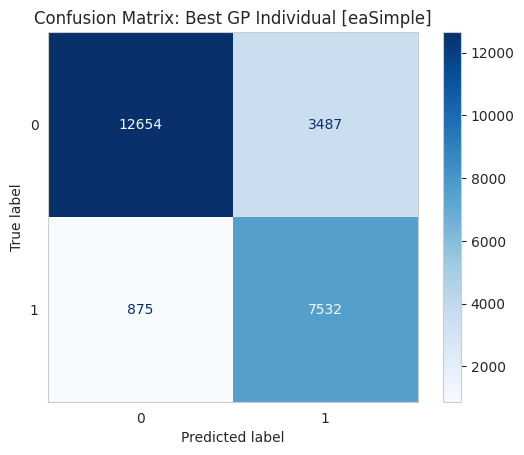

<Figure size 600x500 with 0 Axes>

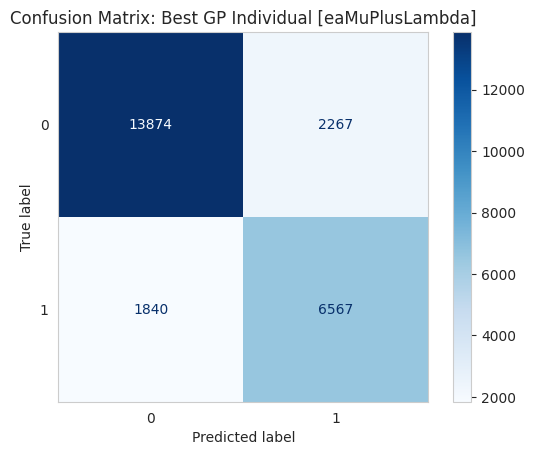

In [ ]:
gp_results = []

# Evolution with eaSimple
results_eaSimple, log_eaSimple, hof_eaSimple,final_pop_eaSimple = train_gp_evolution(
    algo_type="eaSimple",
    ngen=40,
    mu=150
)
gp_results.append(results_eaSimple)

# Evolution with eaMuPlusLambda
results_eaMuPlusLambda, log_eaMuPlusLambda, hof_eaMuPlusLambda,final_eaMuPlusLambda = train_gp_evolution(
    algo_type="eaMuPlusLambda",
    ngen=40,
    mu=150,
    lambda_=100
)
gp_results.append(results_eaMuPlusLambda)

In [ ]:
gp_df = pd.DataFrame(gp_results)

In [ ]:
print(gp_df)

        algo_type  best_train_f1  accuracy  precision    recall  f1_score  \
0        eaSimple       0.779865  0.822307   0.683547  0.895920  0.775456   
1  eaMuPlusLambda       0.768194  0.832695   0.743378  0.781135  0.761789   

   training_time  testing_time  
0     754.420300      0.069896  
1     585.268536      0.132959  


In [ ]:
gp_df.to_pickle("gp_results.pkl")

In [ ]:
print("EaSimple Results:", results_eaSimple)
print("Best Individual (eaSimple):", hof_eaSimple[0])

EaSimple Results: {'algo_type': 'eaSimple', 'best_train_f1': 0.7798650293174023, 'accuracy': 0.8223073162783119, 'precision': 0.6835466013249841, 'recall': 0.8959200666111574, 'f1_score': 0.7754555750025739, 'training_time': 754.4203004837036, 'testing_time': 0.06989645957946777}
Best Individual (eaSimple): sub(X0, add(X19, add(X18, add(add(cos(protected_sqrt(X11)), add(cos(X15), add(X19, add(X18, add(X18, X3))))), add(X18, X3)))))


In [ ]:
print("\nMuPlusLambda Results:", results_eaMuPlusLambda)
print("Best Individual (MuPlusLambda):", hof_eaMuPlusLambda[0])


MuPlusLambda Results: {'algo_type': 'eaMuPlusLambda', 'best_train_f1': 0.7681938697128131, 'accuracy': 0.8326951279126609, 'precision': 0.7433778582748471, 'recall': 0.7811347686451766, 'f1_score': 0.7617887593527057, 'training_time': 585.2685360908508, 'testing_time': 0.13295912742614746}
Best Individual (MuPlusLambda): sub(X1, add(add(X18, cos(X1)), add(add(X3, add(protected_sqrt(X18), X18)), add(X19, X18))))


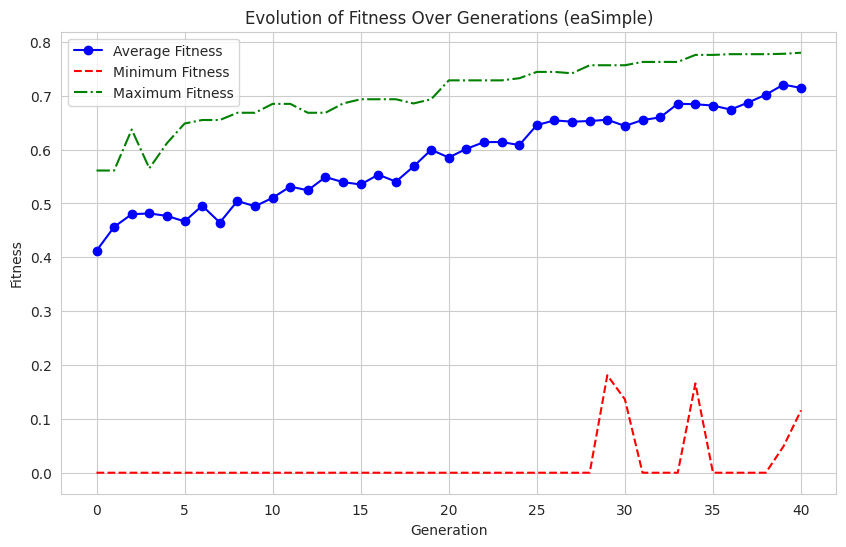

In [ ]:
plot_log_statistics(log_eaSimple)

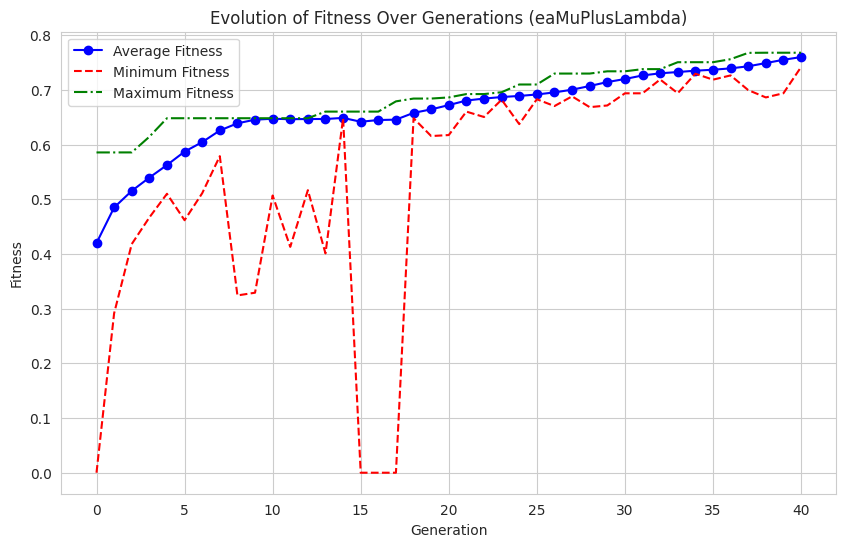

In [ ]:
plot_log_statistics(log_eaMuPlusLambda,algo_type='eaMuPlusLambda')

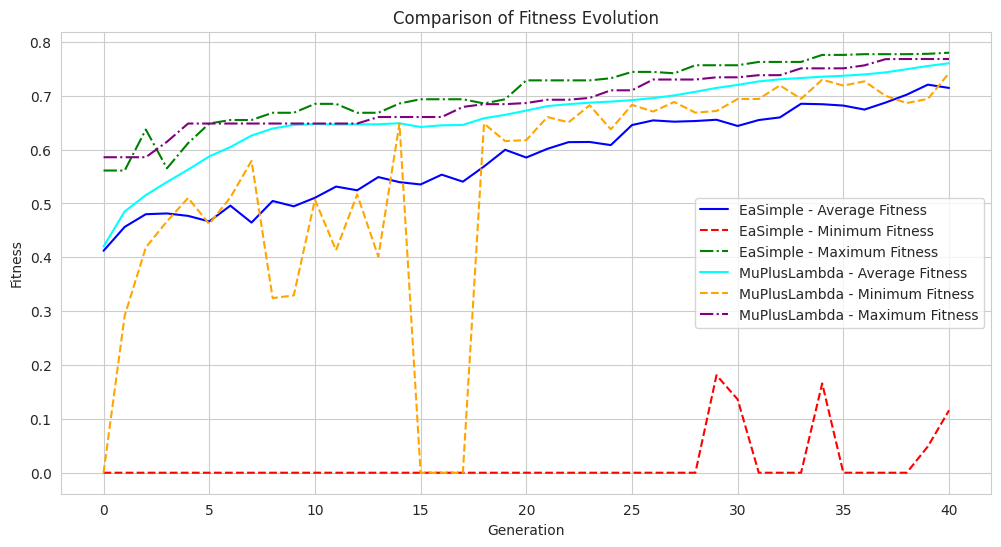

In [ ]:
plot_two_logbooks(log_eaSimple, log_eaMuPlusLambda, labels=("EaSimple", "MuPlusLambda"))

Over 40 generations, **eaSimple** exhibits a steady but somewhat erratic progression in its **average fitness**, whereas **MuPlusLambda** shows a more **consistently rising** trend and achieves a higher average fitness earlier. The **maximum fitness** traces reveal that MuPlusLambda frequently produces individuals with higher fitness than eaSimple, suggesting that the (μ+λ) strategy’s larger population of offspring each generation helps discover superior solutions more quickly.  

Looking at the **minimum fitness**, eaSimple often retains or reintroduces weak individuals, with values dropping to near zero multiple times. In contrast, MuPlusLambda’s minimum fitness tends to stay well above zero after the initial generations, implying that poor solutions are replaced more effectively. Overall, MuPlusLambda sustains a more stable evolution in both **average** and **minimum** fitness, while **eaSimple** shows greater volatility but still converges to moderate fitness levels. This comparative outcome underscores how the (μ+λ) selection scheme can preserve strong individuals and continually incorporate new offspring, leading to both **faster** discovery of high‐fitness solutions and **better** maintenance of population quality.

# Bonus: Voting Classifier with the Final Population GP

In [ ]:
import matplotlib.pyplot as plt
import time
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay
)
from deap import tools

def evaluate_voting_ensemble(pop, k,
                             X_test, y_test,
                             toolbox,
                             plot_confusion_matrix=True):
    """
    Creates a voting classifier from the top k individuals in the given population
    and evaluates it on X_test, y_test. Reports both the time taken to compile the
    individuals (compilation_time) and the time taken to perform the majority vote
    on X_test (testing_time).

    Parameters
    ----------
    pop : list
        The final population of GP individuals (e.g., final_pop_eaMuPlusLambda).
    k : int
        Number of top individuals to select (e.g., 13).
    X_test : array-like of shape (n_samples, n_features)
        Test feature matrix.
    y_test : array-like of shape (n_samples,)
        Test target vector.
    toolbox : deap.base.Toolbox
        The DEAP toolbox, which must have a 'compile' method to turn individuals into callables.
    plot_confusion_matrix : bool, optional (default=True)
        If True, plots a confusion matrix of the voting classifier's predictions.

    Returns
    -------
    metrics_dict : dict
        A dictionary containing:
          - 'accuracy'
          - 'precision'
          - 'recall'
          - 'f1_score'
          - 'compilation_time' : Time to compile the top k individuals
          - 'testing_time'     : Time to predict (majority vote) on X_test
    """

    # 1. Select the top k individuals from the population
    top_k_inds = tools.selBest(pop, k)

    # Measure how long it takes to compile individuals
    compile_start = time.time()
    compiled_funcs = [toolbox.compile(expr=ind) for ind in top_k_inds]
    compilation_time = time.time() - compile_start

    # 2. Majority-vote predictions (measure testing/prediction time)
    test_start = time.time()
    y_pred = []

    for row in X_test:
        votes = 0
        # Evaluate each compiled GP function
        for func in compiled_funcs:
            val = func(*row)
            if val > 0:  # interpret output > 0 as class 1
                votes += 1

        # Majority vote
        if votes > (len(compiled_funcs) / 2):
            y_pred.append(1)
        else:
            y_pred.append(0)

    testing_time = time.time() - test_start

    # 3. Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    metrics_dict = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'compilation_time': compilation_time,
        'testing_time': testing_time
    }

    # 4. Optionally plot confusion matrix
    if plot_confusion_matrix:
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        plt.figure(figsize=(6, 5))
        disp.plot(cmap='Blues', values_format='d')
        plt.title(f'Confusion Matrix: Voting Ensemble (Top {k} Individuals)')
        plt.grid(False)
        plt.show()

    return metrics_dict

<Figure size 600x500 with 0 Axes>

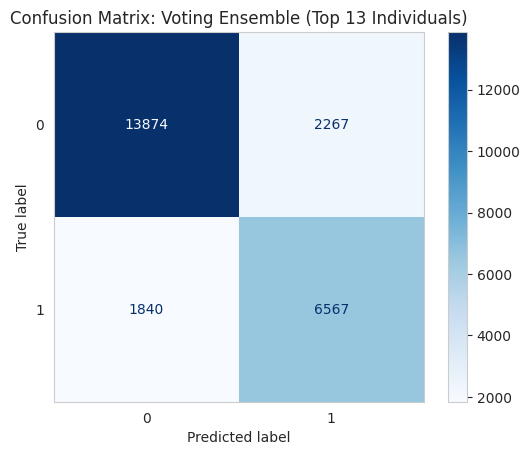

Voting Ensemble Results: {'accuracy': 0.8326951279126609, 'precision': 0.7433778582748471, 'recall': 0.7811347686451766, 'f1_score': 0.7617887593527057, 'compilation_time': 0.0020568370819091797, 'testing_time': 1.5653314590454102}


In [ ]:
votingc_rs= []
votingc_results = evaluate_voting_ensemble(
    pop=final_eaMuPlusLambda,
    k=13,
    X_test=X_test,
    y_test=y_test,
    toolbox=toolbox,
    plot_confusion_matrix=True
)

print("Voting Ensemble Results:", votingc_results)


In [ ]:
votingc_results['algo_type'] = "GP_Voting_Ensemble"
votingc_results['top_k'] = 13

votingc_rs.append(votingc_results)

votingc_df = pd.DataFrame(votingc_rs)

In [ ]:
votingc_df.to_pickle("votingc_results.pkl")

In [ ]:
votingc_df.head()

accuracy  precision    recall  f1_score  compilation_time  testing_time  \
0  0.832695   0.743378  0.781135  0.761789          0.002057      1.565331   

            algo_type  top_k  
0  GP_Voting_Ensemble     13

In [ ]:
gp_df.head()

algo_type  best_train_f1  accuracy  precision    recall  f1_score  \
0        eaSimple       0.779865  0.822307   0.683547  0.895920  0.775456   
1  eaMuPlusLambda       0.768194  0.832695   0.743378  0.781135  0.761789   

   training_time  testing_time  
0     754.420300      0.069896  
1     585.268536      0.132959

In [ ]:
results_df.head()

Sampling        Classifier  Accuracy  Precision    Recall        F1  \
0           None      RandomForest  0.921297   0.891428  0.877007  0.884159   
1           None           XGBoost  0.931726   0.887151  0.917331  0.901988   
2           None  GradientBoosting  0.912987   0.869186  0.878078  0.873609   
3           None        NaiveBayes  0.775623   0.689899  0.626383  0.656608   
4  UnderSampling      RandomForest  0.915512   0.829672  0.947901  0.884855   

   TrainingTime  TestingTime                    ComboLabel  
0     48.881238     0.379410           RandomForest | None  
1      1.296042     0.056700                XGBoost | None  
2     66.559181     0.042049       GradientBoosting | None  
3      0.030053     0.006617             NaiveBayes | None  
4     23.425440     0.288450  RandomForest | UnderSampling

In [ ]:
results_df = pd.read_pickle("results_df.pkl")
gp_df = pd.read_pickle("gp_results.pkl")
votingc_df = pd.read_pickle("votingc_results.pkl")

In [ ]:
def keep_best_EL_models(results_df, metric_column='F1', group_column='Classifier'):
    """
    Keeps only the best models based on the specified metric for each classifier type,
    excluding Naive Bayes.

    Args:
        results_df: The input DataFrame with classifier results.
        metric_column: The column name representing the performance metric (default: 'F1').
        group_column: The column name representing the classifier type (default: 'Classifier').

    Returns:
        A new DataFrame containing only the best models, excluding Naive Bayes.
    """
    # 1. Filter out Naive Bayes
    filtered_df = results_df[results_df[group_column] != "NaiveBayes"]

    # 2. Get the best models (same as before)
    best_models = filtered_df.loc[filtered_df.groupby(group_column)[metric_column].idxmax()]
    return best_models

best_models_df = keep_best_EL_models(results_df)
best_models_df

Sampling        Classifier  Accuracy  Precision    Recall        F1  \
14    SMOTE  GradientBoosting  0.907569   0.816392  0.941953  0.874689   
12    SMOTE      RandomForest  0.922804   0.862745  0.921137  0.890985   
1      None           XGBoost  0.931726   0.887151  0.917331  0.901988   

    TrainingTime  TestingTime  
14     87.089872     0.048635  
12     50.142901     0.335166  
1       1.296042     0.056700

In [ ]:
results_df = best_models_df

In [ ]:
results_df["Classifier"] = results_df["Classifier"] + "_" + results_df["Sampling"]
results_df.rename(columns={
    "F1": "f1_score",
    "TrainingTime": "training_time",
    "TestingTime": "testing_time",
    "Precision": "precision",
    "Recall": "recall",
    "Accuracy": "accuracy",
}, inplace=True)
results_df["algo_type"] = "Ensemble"

In [ ]:
results_df.head()

Sampling              Classifier  accuracy  precision    recall  f1_score  \
14    SMOTE  GradientBoosting_SMOTE  0.907569   0.816392  0.941953  0.874689   
12    SMOTE      RandomForest_SMOTE  0.922804   0.862745  0.921137  0.890985   
1      None            XGBoost_None  0.931726   0.887151  0.917331  0.901988   

    training_time  testing_time algo_type  
14      87.089872      0.048635  Ensemble  
12      50.142901      0.335166  Ensemble  
1        1.296042      0.056700  Ensemble

In [ ]:
gp_df["Classifier"] = "GP_" + gp_df["algo_type"]

In [ ]:
gp_df.head()

algo_type  best_train_f1  accuracy  precision    recall  f1_score  \
0        eaSimple       0.779865  0.822307   0.683547  0.895920  0.775456   
1  eaMuPlusLambda       0.768194  0.832695   0.743378  0.781135  0.761789   

   training_time  testing_time         Classifier  
0     754.420300      0.069896        GP_eaSimple  
1     585.268536      0.132959  GP_eaMuPlusLambda

In [ ]:
votingc_df["Classifier"] = votingc_df.apply(
    lambda row: f"GP_Voting_Ensemble(k={row.top_k})", axis=1
)
votingc_df["training_time"] = None

In [ ]:
votingc_df.head()

accuracy  precision    recall  f1_score  compilation_time  testing_time  \
0  0.832695   0.743378  0.781135  0.761789          0.002057      1.565331   

            algo_type  top_k                Classifier training_time  
0  GP_Voting_Ensemble     13  GP_Voting_Ensemble(k=13)          None

Creating a Unified DataFrame

In [ ]:
common_columns = ["Classifier", "accuracy", "precision", "recall", "f1_score",
                  "training_time", "testing_time", "algo_type"]

df_ensemble = results_df[common_columns]

df_gp = gp_df[common_columns]

df_voting = votingc_df.copy()
df_voting["algo_type"] = "GP_Voting_Ensemble"
df_voting = df_voting[common_columns]

unified_df = pd.concat([df_ensemble, df_gp, df_voting], ignore_index=True)
unified_df.head()

<ipython-input-273-5636bee5eea9>:12: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Classifier  accuracy  precision    recall  f1_score  \
0  GradientBoosting_SMOTE  0.907569   0.816392  0.941953  0.874689   
1      RandomForest_SMOTE  0.922804   0.862745  0.921137  0.890985   
2            XGBoost_None  0.931726   0.887151  0.917331  0.901988   
3             GP_eaSimple  0.822307   0.683547  0.895920  0.775456   
4       GP_eaMuPlusLambda  0.832695   0.743378  0.781135  0.761789   

   training_time  testing_time       algo_type  
0      87.089872      0.048635        Ensemble  
1      50.142901      0.335166        Ensemble  
2       1.296042      0.056700        Ensemble  
3     754.420300      0.069896        eaSimple  
4     585.268536      0.132959  eaMuPlusLambda

In [ ]:
unified_df.to_pickle("unified_df.pkl")
unified_df.to_csv("unified_df.csv", index=False)

In [ ]:
unified_df

Classifier  accuracy  precision    recall  f1_score  \
0    GradientBoosting_SMOTE  0.907569   0.816392  0.941953  0.874689   
1        RandomForest_SMOTE  0.922804   0.862745  0.921137  0.890985   
2              XGBoost_None  0.931726   0.887151  0.917331  0.901988   
3               GP_eaSimple  0.822307   0.683547  0.895920  0.775456   
4         GP_eaMuPlusLambda  0.832695   0.743378  0.781135  0.761789   
5  GP_Voting_Ensemble(k=13)  0.832695   0.743378  0.781135  0.761789   

   training_time  testing_time           algo_type  
0      87.089872      0.048635            Ensemble  
1      50.142901      0.335166            Ensemble  
2       1.296042      0.056700            Ensemble  
3     754.420300      0.069896            eaSimple  
4     585.268536      0.132959      eaMuPlusLambda  
5            NaN      1.565331  GP_Voting_Ensemble

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_metrics_seaborn(df_in):
    """
    Creates six Seaborn bar charts (Accuracy, Precision, Recall, F1-Score,
    Training Time, and Testing Time), each individually sorted in descending order
    by the metric being plotted. Bars are colored by 'algo_type'.

    Parameters
    ----------
    df_in : pd.DataFrame
        Expected columns:
         - 'Classifier'
         - 'accuracy', 'precision', 'recall', 'f1_score'
         - 'training_time', 'testing_time'
         - 'algo_type'
        with rows representing various models/approaches.
    """

    sns.set_style("whitegrid")
    df = df_in.copy()

    def bar_plot(metric, title, ylabel, exclude_nan=False):
      """
      Sort df by 'metric' in descending order, then create a Seaborn bar plot.
      Optionally exclude rows with NaN in 'metric' (for training_time).
      """
      df_sorted = df.sort_values(by=metric, ascending=False).reset_index(drop=True)
      if exclude_nan:
          df_sorted = df_sorted.dropna(subset=[metric])

      plt.figure(figsize=(10, 6))
      ax = sns.barplot(data=df_sorted, x="Classifier", y=metric, hue="algo_type", dodge=True)
      ax.set_title(title)
      ax.set_xlabel("Classifier")
      ax.set_ylabel(ylabel)
      ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

      # Move legend outside the plot
      plt.legend(title="Algorithm Type", loc="upper left", bbox_to_anchor=(1, 1))
      plt.tight_layout()
      plt.show()

    # 1) Accuracy
    bar_plot("accuracy", "Accuracy by Classifier (Sorted by Accuracy)", "Accuracy")

    # 2) Precision
    bar_plot("precision", "Precision by Classifier (Sorted by Precision)", "Precision")

    # 3) Recall
    bar_plot("recall", "Recall by Classifier (Sorted by Recall)", "Recall")

    # 4) F1-Score
    bar_plot("f1_score", "F1-Score by Classifier (Sorted by F1)", "F1-Score")

    # 5) Training Time (exclude models with NaN training_time)
    bar_plot("training_time", "Training Time by Classifier (Sorted by Training Time)",
             "Training Time (seconds)", exclude_nan=True)

    # 6) Testing Time
    bar_plot("testing_time", "Testing Time by Classifier (Sorted by Testing Time)",
             "Testing Time (seconds)")

In [ ]:
#unified_df = pd.read_pickle("unified_df.pkl")

# Comparative Analysis

<ipython-input-276-b7091a238350>:38: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



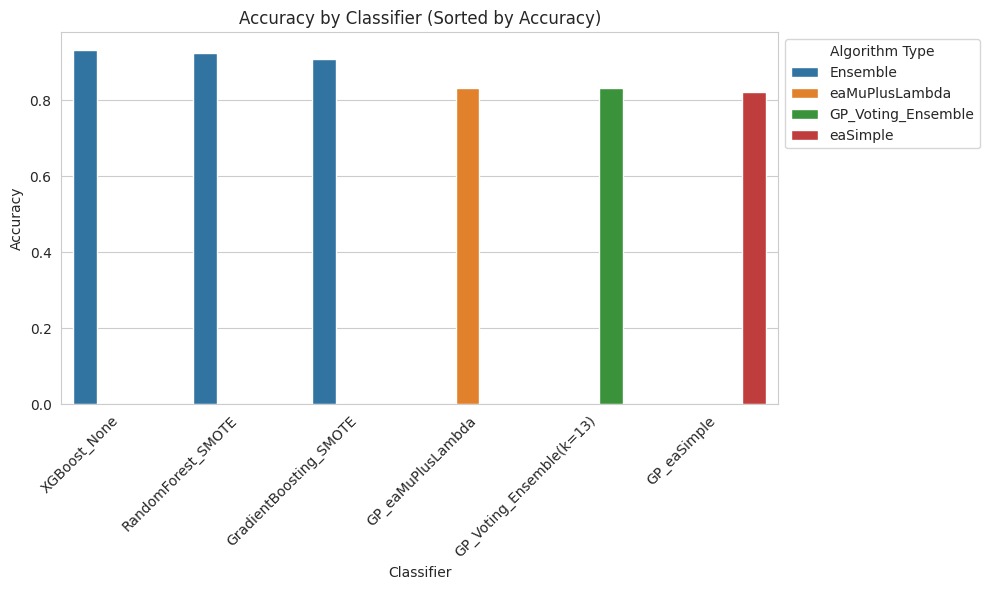

<ipython-input-276-b7091a238350>:38: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



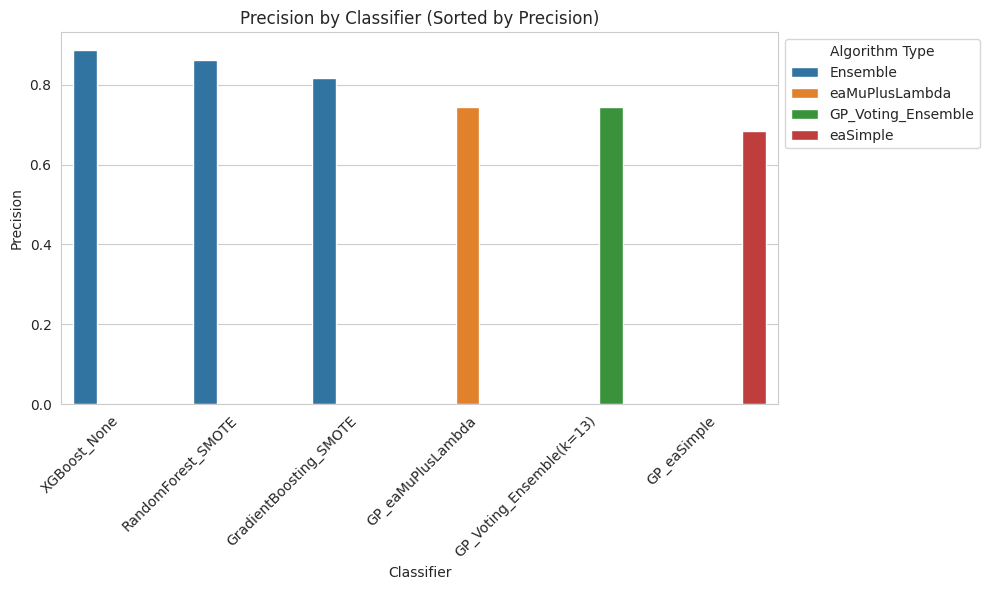

<ipython-input-276-b7091a238350>:38: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



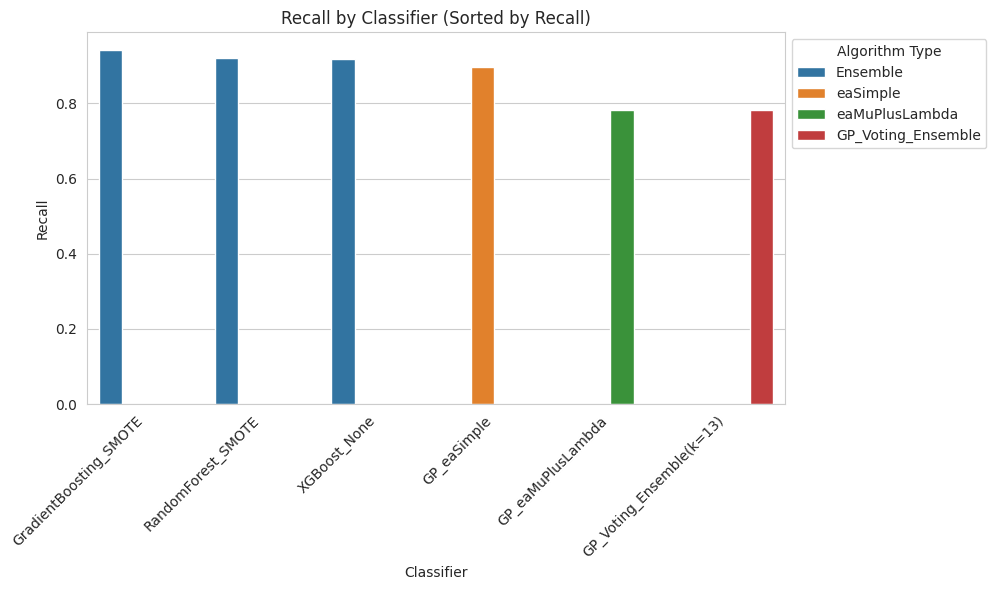

<ipython-input-276-b7091a238350>:38: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



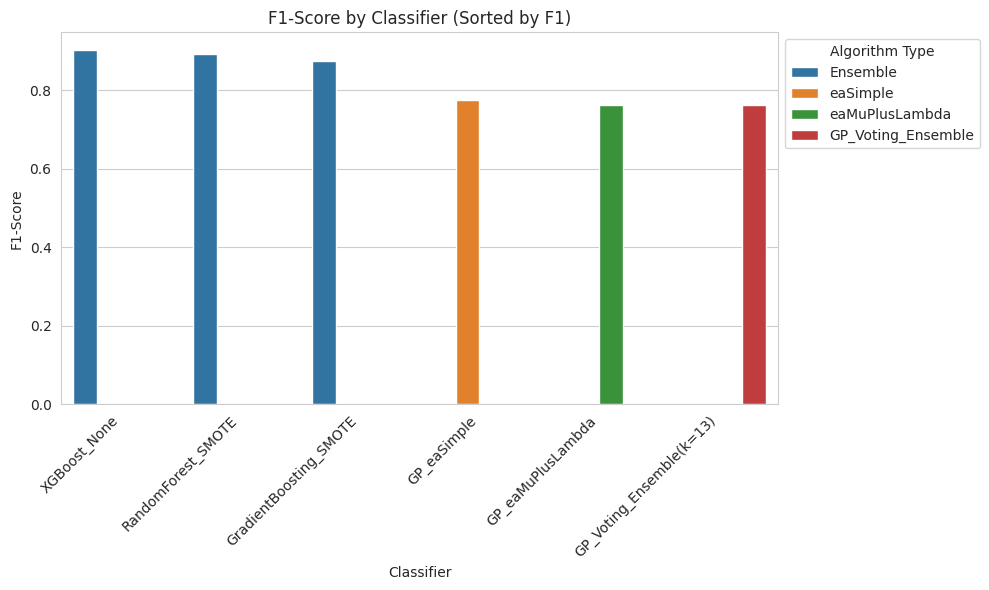

<ipython-input-276-b7091a238350>:38: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



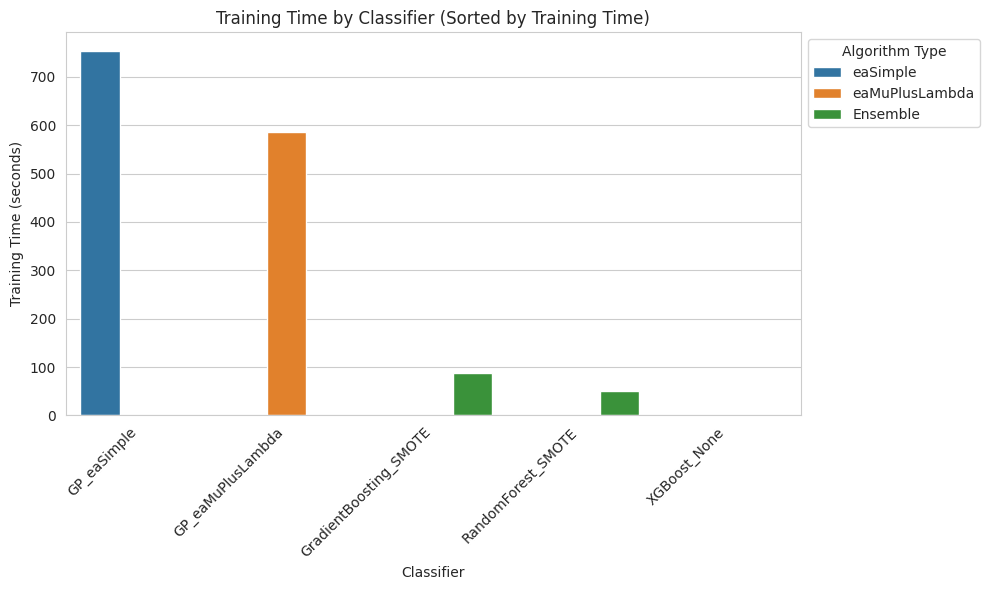

<ipython-input-276-b7091a238350>:38: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



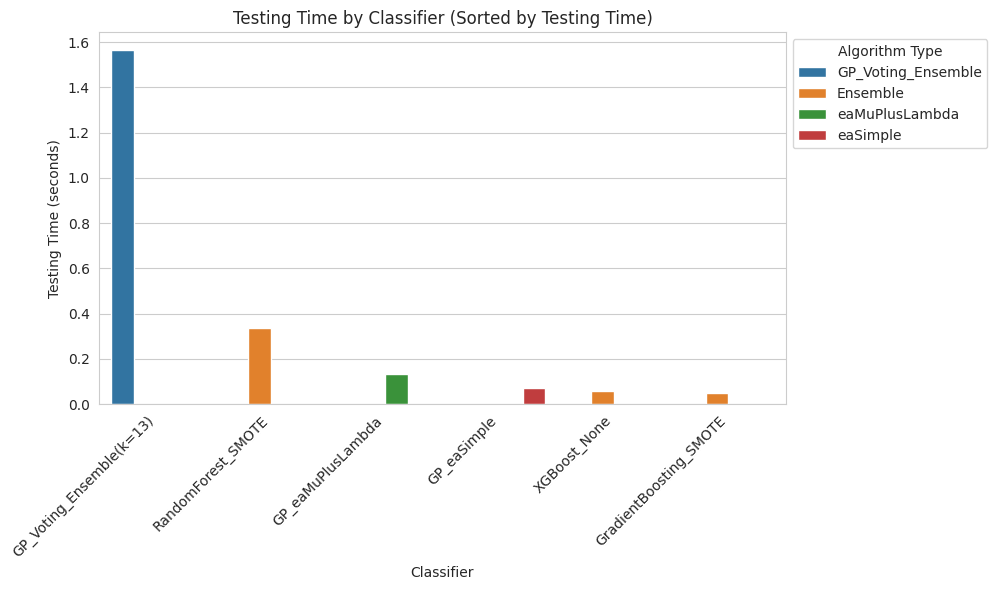

In [ ]:
plot_metrics_seaborn(unified_df)

## **1. Performance**

### **Accuracy & F1‐Score**
XGBoost (GPU-accelerated) consistently attains the **highest** Accuracy and F1‐Score, showcasing its strength in handling complex feature interactions. Random Forest and Gradient Boosting follow closely, providing strong predictive power but typically lagging slightly behind XGBoost’s top results. Among Genetic Programming (GP) methods, **eaMuPlusLambda** surpasses eaSimple, achieving moderate Accuracy and F1, yet it does not match the best ensemble approaches. A **GP Voting Ensemble** (k=13) also lies in a middle tier of performance but still below well-tuned ensemble models.

### **Precision & Recall**
The three principal ensemble methods (XGBoost, Random Forest, and Gradient Boosting) also dominate in Precision and Recall, with relatively modest variations among them. GP-based approaches, particularly eaMuPlusLambda and the GP Voting Ensemble, achieve moderate performance on these metrics, indicating their ability to effectively identify signal events, though they remain less consistent compared to the leading ensembles. eaSimple lags further behind, reflecting its volatile evolution and tendency to retain weaker solutions. However, in terms of Recall, it outperforms eaMuPlusLambda and the GP Voting Ensemble.


## **2. Efficiency**

### **Training Time**
- **Gradient Boosting** typically requires more time than Random Forest, given its iterative boosting phases, though it is still much faster than GP methods.  
- **XGBoost** benefits from GPU support and specialized optimizations, achieving **faster** training times relative to its high predictive performance.  
- **Random Forest** commonly trains more quickly than Gradient Boosting but can become slower if heavily parameterized or if sampling strategies are used.  
- **Genetic Programming** (eaSimple, eaMuPlusLambda) incurs **substantially higher** training overhead. Times often range well above the standard ensembles, with eaSimple in particular sometimes exceeding 700 seconds. eaMuPlusLambda is somewhat more efficient but remains considerably slower than XGBoost or Random Forest.

### **Testing Time**
- A **GP Voting Ensemble** with multiple evolved trees has the **highest** inference cost, as each sample is evaluated by numerous GP expressions.  
- **Random Forest** can also show relatively large inference times if it comprises numerous trees.  
- **XGBoost** maintains **fast** prediction, aided by GPU-efficient implementations.  
- Single‐tree GP solutions (eaSimple, eaMuPlusLambda) yield moderate testing times—faster than multi-tree ensembles but generally slower than optimized XGBoost.

### **Computational Cost of GP vs. Ensemble**
Evolutionary methods demand **substantial** computational resources, as they repeatedly generate, mutate, and select GP individuals over many generations. Even though MuPlusLambda stabilizes and converges better than eaSimple, it does not compete with the speed of widely optimized libraries like XGBoost or Random Forest.

## **3. Model Complexity**

### **Interpretability**
While **Random Forest** and **XGBoost** are sometimes seen as “black box” approaches, tools exist for analyzing feature importances and partial dependencies. However, comprehending an entire ensemble of trees in detail remains challenging. Genetic Programming, by contrast, could provide a **single** symbolic expression—potentially more transparent **if** it remains shallow. In real-world scenarios, GP trees can become large, undermining practical interpretability gains.

### **Evolved Models vs. Ensemble Methods**
Ensembles unite many weak learners, resulting in robust predictions but limited high-level clarity. GP solutions can in theory be simpler (one expression) but often end up bushy or deeply nested. Thus, both ensembles and GP can grow complex, with actual simplicity depending heavily on hyperparameter constraints (e.g., maximum depth) and the specific dataset.


## **4. Advantages and Disadvantages**

### **Ensemble Learning (Random Forest, XGBoost, Gradient Boosting)**
- **Strengths**:  
  - Excellent predictive performance, with **XGBoost** especially effective under GPU acceleration.  
  - Scalable to large data and robust to moderate class imbalances.  
  - Well-established libraries and extensive support.  
- **Weaknesses**:  
  - Relatively limited global interpretability (“black box”).  
  - May require detailed hyperparameter tuning (especially GBM).  
  - Large ensembles can elevate testing time and memory usage.

### **Evolutionary Learning (eaSimple, eaMuPlusLambda)**
- **Strengths**:  
  - Flexible approach for discovering novel model structures beyond typical trees.  
  - Potential for interpretability if the final GP trees remain small.  
  - **(μ+λ)** selection (MuPlusLambda) converges more stably than eaSimple.  
- **Weaknesses**:  
  - Computationally costly to train (long evolution cycles).  
  - Final accuracy and F1 generally lower than top ensembles.  
  - Trees can bloat and become less interpretable in practice.

### **GP Voting Ensembles**
- **Strengths**:  
  - Can bolster GP performance by combining multiple good individuals.  
  - Each GP tree can theoretically be inspected for interpretability.  
- **Weaknesses**:  
  - Inference time grows sharply with the number of trees.  
  - Only marginal gains compared to top-performing ensembles.


# **Conclusion**

**XGBoost** emerges as the **optimal** method for Higgs Boson detection in these experiments, excelling in **accuracy**, **speed**, and **predictive robustness**, largely due to GPU acceleration. Among the GP approaches, **eaMuPlusLambda** demonstrates greater **effectiveness** than eaSimple in terms of convergence and final fitness. However, both remain slower and less accurate compared to the leading ensemble methods.